# Creating and Analyzing Fuzzy Cognitive Maps (FCMs)

At this stage, we will create a thorough inventory of the Concepts and Connections originally mentioned by stakeholders, with references to support choice of generalized labels that have been addressed in all of the stakeholder interviews. To enhance our comprehension, we will perform a comprehensive examination of these concepts by categorizing similar concepts or terms using a technique known as clustering, as depicted in table (meta code book) (1).

Consequently, We did an overview of the structure and complexity of each individual FCM . We counted the number of nodes and connections of every individual model. Where nodes are the concepts mentioned by interviewees, and connections are the linkage between two nodes. We also counted the number of receivers and ordinary nodes in every FCM, and calculated the centrality of each concept in each FCM. Receivers are concepts with only indegree and ordinary nodes are concepts that have both indegree and outdegree.  Centrality is defined as the absolute value of either a) overall influence in the model (all + and –relationships indicated, for entire model) or b) influence of individual concepts as indicated by positive (+) or negative (-) values placed on connections between components; indicates a) the total influence (positive and negative) to be in the system or b) the conceptual weight/importance of individual concepts (Kosko, 1986,1987). The higher the value, the greater is the importance of all concepts or the individual weight of a concept in the overall model.
Methods related to how to calculate each variable can be found as follow:

1.Total number of c concept

2.Total number of connections

3.Total number of In and Out relationship each concept

4.Indegree and Outdegree of each concept

5.Connections per concept

6.Type of concept (driver, ordinary, receiver)

7.Centrality: absolute value of either a) overall influence in the model (all + and –relationships indicated, for entire model) or b) influence of individual concepts as indicated by positive (+) or negative (-) values placed on connections between components; indicates a) the total influence (positive and negative) to be in the system or b) the conceptual weight/importance of individual concepts (Kosko, 1986,1987). The higher the value, the greater is the importance of all concepts or the individual weight of a concept in the overall model. C/N: number of connections divided by number of variables(concepts)

8.Indegree: Divide the number of connections pointing towards the concept by the total number of concepts. This gives you a sense of how "influential" a concept is in terms of being affected by other concepts. Indegree = (Number of connections pointing towards the concept) / (Total number of concepts)

9.Outdegree: Divide the number of connections originating from the concept by the total number of concepts. This tells you how much a concept is influencing other concepts. Outdegree = (Number of connections originating from the concept) / (Total number of concepts)


# STEP 1:Import FCMs:
#The script reads each FCM CSV file into a separate Pandas DataFrame using pd.read_csv().

#Exploring Properties:

#1. Total Number of Concepts: The total number of unique concepts is calculated by finding the number of nodes in the graph representation of the each FCMs.
#2.Indegrees and Outdegrees: In a directed graph (like the FCM), the indegree of a node is the number of edges coming into the node, and the outdegree is the number of edges going out of the node. These are calculated using G.in_degree() and G.out_degree() functions.
#3.Connections per Concept: This is simply the sum of indegree and outdegree for each concept node, calculated by adding the indegree and outdegree values obtained in the previous step.
#4.Filtering nodes with zero indegree or outdegree will identify these types of concepts under the assumption that input concepts have no indegree and output concepts have no outdegree.
#5.Centrality Measures: Centrality measures provide information about the relative importance of nodes in the network. Here, three centrality measures are calculated:
#6.Degree centrality: the proportion of nodes that a particular node is connected to.

In [3]:
from collections import Counter
import pandas as pd

# FCM1: Importing relationship matrix data from a CSV file

# Reading a csv file using pandas
df = pd.read_csv('../Original Data/EXPFCM1.csv', index_col=0)  # Assuming the first column contains row labels

# Now df contains the relationship matrix
print(df)

# Total number of concepts
total_concepts = len(df.index)

# Total number of connections (considering any non-zero value as a connection)
total_connections = (df != 0).sum().sum()

# Indegree and Outdegree of each concept (considering any non-zero value as a connection)
indegrees = (df != 0).sum(axis=0)
outdegrees = (df != 0).sum(axis=1)

# Number of Connections per concept (considering any non-zero value as a connection)
connections_per_concept = indegrees + outdegrees

# Type of concept (driver, ordinary, receiver)
types = []
for i in range(total_concepts):
    if indegrees.iloc[i] == 0:
        types.append("Driver")
    elif outdegrees.iloc[i] == 0:
        types.append("Receiver")
    else:
        types.append("Ordinary")

# Centrality: number of connections per concept divided by total number of concepts
centrality = connections_per_concept / total_concepts

# Creating a DataFrame to store the results
results_df = pd.DataFrame({
    'Indegree': indegrees,
    'Outdegree': outdegrees,
    'Connections per Concept': connections_per_concept,
    'Type': types,
    'Centrality': centrality
})

# Print number of concepts and total number of connections
print("Number of Concepts:", total_concepts)
print("Total Number of Connections:", total_connections)

# Printing the DataFrame
print(results_df)


       C4   C21  C19  C12   C9  C14  C20   C1   C27   C29  ...  C43   C36  \
C4   0.00  0.00  0.0  0.0  0.0  0.0  0.0  1.0  0.00  0.00  ...  0.0  0.00   
C21 -0.75  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  ...  0.0  0.00   
C19  0.00  0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  ...  0.0  0.00   
C12  0.00  0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  ...  0.0  0.00   
C9   0.00  0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  ...  0.0  0.00   
C14  0.00  0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  ...  0.0  0.00   
C20  0.00  0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  ...  0.0  0.00   
C1   0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.75  ...  0.0  0.00   
C27  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  ...  0.0  0.00   
C29  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.25  0.00  ...  0.0  0.00   
C44  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.75  ...  0.0  0.75   
C43  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  ...  0.0  0.25   

In [4]:
from collections import Counter
import pandas as pd

# FCM2: Importing relationship matrix data from a CSV file

# Reading a csv file using pandas
df = pd.read_csv('../Original Data/EXPFCM2.csv', index_col=0)  # Assuming the first column contains row labels

# Now df contains the relationship matrix
print(df)

# Total number of concepts
total_concepts = len(df.index)

# Total number of connections (considering any non-zero value as a connection)
total_connections = (df != 0).sum().sum()

# Indegree and Outdegree of each concept (considering any non-zero value as a connection)
indegrees = (df != 0).sum(axis=0)
outdegrees = (df != 0).sum(axis=1)

# Number of Connections per concept (considering any non-zero value as a connection)
connections_per_concept = indegrees + outdegrees

# Type of concept (driver, ordinary, receiver)
types = []
for i in range(total_concepts):
    if indegrees.iloc[i] == 0:
        types.append("Driver")
    elif outdegrees.iloc[i] == 0:
        types.append("Receiver")
    else:
        types.append("Ordinary")

# Centrality: number of connections per concept divided by total number of concepts
centrality = connections_per_concept / total_concepts

# Creating a DataFrame to store the results
results_df = pd.DataFrame({
    'Indegree': indegrees,
    'Outdegree': outdegrees,
    'Connections per Concept': connections_per_concept,
    'Type': types,
    'Centrality': centrality
})

# Print number of concepts and total number of connections
print("Number of Concepts:", total_concepts)
print("Total Number of Connections:", total_connections)

# Printing the DataFrame
print(results_df)


      C1   C2    C3    C4  C45  C46  C50  C47  C48  C26  ...  C28  C31   C36  \
C1   0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C2   1.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C3   1.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C4   0.0  0.0  0.75  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C45  0.0  0.5  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C46  0.0  0.0  0.00  0.00  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C50  0.0  0.0  0.00  0.00  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C47  0.0  0.0  0.00  0.00  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C48  0.0  0.0  0.00  0.00  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C26  0.0  0.0  0.00  0.00  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C21  0.0  0.0  0.00 -1.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00   
C8   0.0  0.0  0.00  0.00  0.0  0.0  0.0

In [5]:
from collections import Counter
import pandas as pd

# FCM3: Importing relationship matrix data from a CSV file

# Reading a csv file using pandas
df = pd.read_csv('../Original Data/EXPFCM3.csv', index_col=0)  # Assuming the first column contains row labels

# Now df contains the relationship matrix
print(df)

# Total number of concepts
total_concepts = len(df.index)

# Total number of connections (considering any non-zero value as a connection)
total_connections = (df != 0).sum().sum()

# Indegree and Outdegree of each concept (considering any non-zero value as a connection)
indegrees = (df != 0).sum(axis=0)
outdegrees = (df != 0).sum(axis=1)

# Number of Connections per concept (considering any non-zero value as a connection)
connections_per_concept = indegrees + outdegrees

# Type of concept (driver, ordinary, receiver)
types = []
for i in range(total_concepts):
    if indegrees.iloc[i] == 0:
        types.append("Driver")
    elif outdegrees.iloc[i] == 0:
        types.append("Receiver")
    else:
        types.append("Ordinary")

# Centrality: number of connections per concept divided by total number of concepts
centrality = connections_per_concept / total_concepts

# Creating a DataFrame to store the results
results_df = pd.DataFrame({
    'Indegree': indegrees,
    'Outdegree': outdegrees,
    'Connections per Concept': connections_per_concept,
    'Type': types,
    'Centrality': centrality
})

# Print number of concepts and total number of connections
print("Number of Concepts:", total_concepts)
print("Total Number of Connections:", total_connections)

# Printing the DataFrame
print(results_df)



       C1   C27  C28    C4  C30   C29  C31   C8   C32  C33  ...  C37  C9  C10  \
C1   0.00  0.00    0  0.00    0  0.75    0  0.0  0.00    0  ...    0   0    0   
C27  1.00  0.00    0  0.00    0  0.00    0  0.0  0.75    0  ...    0   0    0   
C28  0.00  0.25    0  0.00    0  0.00    0  0.0  0.00    0  ...    0   0    0   
C4   1.00  0.00    0  0.00    0  0.00    0  0.0  0.00    0  ...    0   0    0   
C30  0.00  0.25    0  0.00    0  0.00    0  0.0  0.00    0  ...    0   0    0   
C29  0.00  0.75    0  0.00    0  0.00    0  1.0  0.00    0  ...    0   0    0   
C31  0.00  0.50    0  0.00    0  0.00    0  0.0  0.00    0  ...    0   0    0   
C8   0.00  0.00    0  0.00    0  0.00    0  0.0  0.00    0  ...    0   0    0   
C32  0.00  0.00    0  0.00    0  0.00    0  0.0  0.00   -1  ...    0   0    0   
C33  0.00  0.00    0  0.00    0  0.00    0  0.0  0.00    0  ...    0   0    0   
C42 -1.00  0.00    0  0.00    0  0.00    0 -0.5  0.00    0  ...    0   0    0   
C22  0.25  0.00    0  0.00  

In [6]:
from collections import Counter
import pandas as pd

# FCM4: Importing relationship matrix data from a CSV file

# Reading a csv file using pandas
df = pd.read_csv('../Original Data/EXPFCM4.csv', index_col=0)  # Assuming the first column contains row labels

# Now df contains the relationship matrix
print(df)

# Total number of concepts
total_concepts = len(df.index)

# Total number of connections (considering any non-zero value as a connection)
total_connections = (df != 0).sum().sum()

# Indegree and Outdegree of each concept (considering any non-zero value as a connection)
indegrees = (df != 0).sum(axis=0)
outdegrees = (df != 0).sum(axis=1)

# Number of Connections per concept (considering any non-zero value as a con'Original Data/EXPFCM4.csv'nection)
connections_per_concept = indegrees + outdegrees

# Type of concept (driver, ordinary, receiver)
types = []
for i in range(total_concepts):
    if indegrees.iloc[i] == 0:
        types.append("Driver")
    elif outdegrees.iloc[i] == 0:
        types.append("Receiver")
    else:
        types.append("Ordinary")

# Centrality: number of connections per concept divided by total number of concepts
centrality = connections_per_concept / total_concepts

# Creating a DataFrame to store the results
results_df = pd.DataFrame({
    'Indegree': indegrees,
    'Outdegree': outdegrees,
    'Connections per Concept': connections_per_concept,
    'Type': types,
    'Centrality': centrality
})

# Print number of concepts and total number of connections
print("Number of Concepts:", total_concepts)
print("Total Number of Connections:", total_connections)

# Printing the DataFrame
print(results_df)


       C1    C4  C5   C6    C7    C8  C11  C12  C18  C24  ...  C34  C35   C38  \
C1   0.00  0.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C4   1.00  0.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C5   0.00  0.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C6   0.75  0.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C7   0.00  0.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C8   0.00  0.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C11  0.00 -1.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C12  0.00 -1.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C18  0.00 -0.25   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C24  0.00  0.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C25  0.00  0.00   0  0.0  0.00  0.00    0    0    0    0  ...    0    0  0.00   
C26  0.00  0.00   0  0.0  0.

In [7]:
import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Set to store unique concepts
unique_concepts = set()

# Load each FCM and extract unique concepts
for file_path in file_paths:
    df = pd.read_csv(file_path, index_col=0)
    unique_concepts.update(df.index)
    unique_concepts.update(df.columns)

# Calculate the total number of unique concepts
total_unique_concepts = len(unique_concepts)

# List to store all relationships
all_relationships = []

# Load each FCM and extract all relationships
for file_path in file_paths:
    df = pd.read_csv(file_path, index_col=0)
    all_relationships.extend((source, target) for source in df.index for target in df.columns if df.at[source, target] != 0)

# Calculate the total number of existing relationships
total_existing_relationships = len(all_relationships)

# Print the total number of unique concepts
print("Total number of unique concepts:", total_unique_concepts)

# Print the total number of existing relationships
print("Total number of existing relationships over all FCMs:", total_existing_relationships)

Total number of unique concepts: 50
Total number of existing relationships over all FCMs: 145


# STEP 2: qualitative aggregation

The purpose of combining terms in the study was to aggregate and group similar factors mentioned by the participants during the pilot interviews. After conducting the interviews where participants used their own terminology to describe factors, the researchers needed to identify and combine terms that referred to the same underlying factor or concept. This aggregation process involved:
•	Looking across all the fuzzy cognitive maps gathered from the interviews
•	Finding similar terms used by different participants to describe the same factor
•	unifying all concepts by Grouping those similar terms together into broader categories or factors
•	Understanding Participants' Opinions on Causal Relationships (entropy).
This allowed the researchers to consolidate the diverse perspectives and terminologies used by participants into a more cohesive set of factors. The aggregated terms and factors were then used for further analysis in this study for instance Information entropy is used to measure participant agreement on causal relationships. The entropy score is calculated using the frequency of relationship between two concepts.

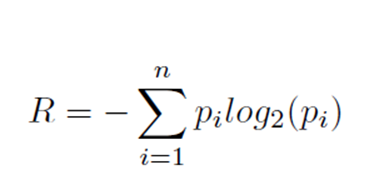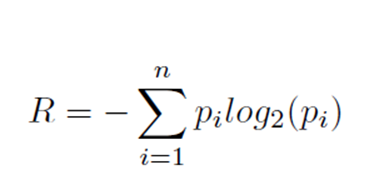


The entropy score is the agreement of answers about the causal relationship per relationship between two concepts over all FCMs.

We compiled a comprehensive list of concepts discussed in all stakeholder interviews during this stage. To gain a deeper understanding, we conducted a thorough analysis of these concepts by grouping similar concepts or terms through clustering. 
To facilitate this consolidation, we conducted a comprehensive examination of scholarly articles in the domain of preserving world cultural heritage sites. We specifically focused our analysis on the variables identified by UNESCO as determinants that influence the Outstanding Universal Value (OUV) of these sites. and review published papers that cite the case study country, Oman. When aggregating stakeholders' knowledge, it is essential to take into account both stakeholder knowledge and scientific knowledge. This process ensures the coherence of the model and verifies it using relationships that have been established through empirical evidence (Hobbs et al., 2002; ¨Ozesmi and ¨Ozesmi, 2004; Glory and Kok, 2021).


There are concerns about the potential confusion that may occur when using generalized labels that stakeholders did not agree upon. Olazabal et al., 2018 have raised these concerns regarding the use of scientific literature to support stakeholder knowledge. Fairweather and Hunt (2011) argue against the use of qualitative aggregation, as it results in broad labels instead of offering a predetermined set of concepts for stakeholders to select from. They argue that the post-processing of stakeholder knowledge heavily depends on the researcher's subjective interpretation of stakeholder expressions. After gathering information from stakeholders, the researcher must make additional decisions as part of the post-processing activities. Researchers' subjective perspectives can influence the outcome of coproduction, and their input may carry more weight than that of stakeholders (Voinov et al., 2016). In order to address these concerns, we utilize scientific literature to establish an unbiased method for consolidating stakeholder knowledge and assigning general labels to clusters of ideas. This helps minimize the subjective interpretation of stakeholder expressions. Literature often employs commonly used expressions to cluster concepts, provide generalized labels for concepts, establish sub-connections, and fill in missing connections. In order to ensure that stakeholders have a clear understanding of the terminology used, a glossary of the original concepts in clusters and their generalized labels is provided in the online form for weighting connections during the second episode of stakeholder engagement.
qualitative aggregation is done on individual stakeholder knowledge through analysis, and allocating generalized labels to groups of concepts.

After unifying all concepts, the researchers compared if each individual concept is mentioned in more than two FCMs, if yes this concept will be kept in the aggregated FCM; If no, include the concept only if it meets one of the following criteria: 
•	It has been mentioned in the literature review as determinants that influence the preservation of world cultural heritage sites that cite the case study country, Oman. 
•	It is a driving component, meaning it has a significant influence on the system and Its centrality measure is equal or more than 0.75, indicating it is a central element in the network of concepts.



# Aggregation Component: 

# 1 check the frequency of each concept over all FCMs

In [8]:
import pandas as pd
import os

# Dictionary to store the frequency of each concept
concept_frequency = {}

# Load each FCM and extract unique concepts
# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]
for file_path in file_paths:
    df = pd.read_csv(file_path, index_col=0)
    for concept in df.columns:
        concept_frequency[concept] = concept_frequency.get(concept, 0) + 1

# Sort concept frequency dictionary by values in ascending order
concept_frequency_sorted = sorted(concept_frequency.items(), key=lambda x: x[1])

# Ensure the directory exists
output_dir = 'Analysis and output folders'
os.makedirs(output_dir, exist_ok=True)

# Save concept frequency as CSV
output_file_path = os.path.join(output_dir, 'concept_frequency_across_fcms.csv')
df_concept_frequency = pd.DataFrame(concept_frequency_sorted, columns=['Concept', 'Frequency'])
df_concept_frequency.to_csv(output_file_path, index=False)

# Display the frequency of each concept
for concept, freq in concept_frequency_sorted:
    print(f"Concept '{concept}' mentioned {freq} times across all FCMs")

Concept 'C14' mentioned 1 times across all FCMs
Concept 'C49' mentioned 1 times across all FCMs
Concept 'C2' mentioned 1 times across all FCMs
Concept 'C3' mentioned 1 times across all FCMs
Concept 'C17' mentioned 1 times across all FCMs
Concept 'C23' mentioned 1 times across all FCMs
Concept 'C39' mentioned 1 times across all FCMs
Concept 'C22' mentioned 1 times across all FCMs
Concept 'C10' mentioned 1 times across all FCMs
Concept 'C13' mentioned 1 times across all FCMs
Concept 'C16' mentioned 1 times across all FCMs
Concept 'C15' mentioned 1 times across all FCMs
Concept 'C5' mentioned 1 times across all FCMs
Concept 'C6' mentioned 1 times across all FCMs
Concept 'C7' mentioned 1 times across all FCMs
Concept 'C24' mentioned 1 times across all FCMs
Concept 'C34' mentioned 1 times across all FCMs
Concept 'C35' mentioned 1 times across all FCMs
Concept 'C20' mentioned 2 times across all FCMs
Concept 'C50' mentioned 2 times across all FCMs
Concept 'C48' mentioned 2 times across all FC

In [9]:
import pandas as pd

# Dictionary to store the frequency of each concept along with the FCM names
concept_frequency = {}

# Load each FCM and extract unique concepts
# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]
for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, index_col=0)
    for concept in df.columns:
        if concept not in concept_frequency:
            concept_frequency[concept] = {'Frequency': 1, 'FCMs': [f"FCM{i}"]}
        else:
            concept_frequency[concept]['Frequency'] += 1
            concept_frequency[concept]['FCMs'].append(f"FCM{i}")

# Convert the dictionary to a list of tuples for sorting
concept_frequency_sorted = [(concept, data['Frequency'], ", ".join(data['FCMs'])) for concept, data in concept_frequency.items()]

# Sort concept frequency list by frequency in descending order
concept_frequency_sorted.sort(key=lambda x: x[1], reverse=True)

# Ensure the directory exists
output_dir = 'Analysis and output folders'
os.makedirs(output_dir, exist_ok=True)

# Save concept frequency as CSV
df_concept_frequency = pd.DataFrame(concept_frequency_sorted, columns=['Concept', 'Frequency', 'FCMs'])
df_concept_frequency.to_csv(output_file_path, index=False)


# Display the frequency of each concept along with the FCM names
for concept, freq, fcm_names in concept_frequency_sorted:
    print(f"Concept '{concept}' mentioned {freq} times across FCMs: {fcm_names}")


Concept 'C4' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C1' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C27' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C29' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C44' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C43' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C28' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C42' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C46' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C26' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C8' mentioned 4 times across FCMs: FCM1, FCM2, FCM3, FCM4
Concept 'C21' mentioned 3 times across FCMs: FCM1, FCM2, FCM3
Concept 'C19' mentioned 3 times across FCMs: FCM1, FCM2, FCM3
Concept 'C12' mentioned 3 times across FCMs: FCM1, FCM2, FCM4
Concept 'C9' mentioned 3 times across FCMs: FCM1, FCM2, FCM3
Concept 

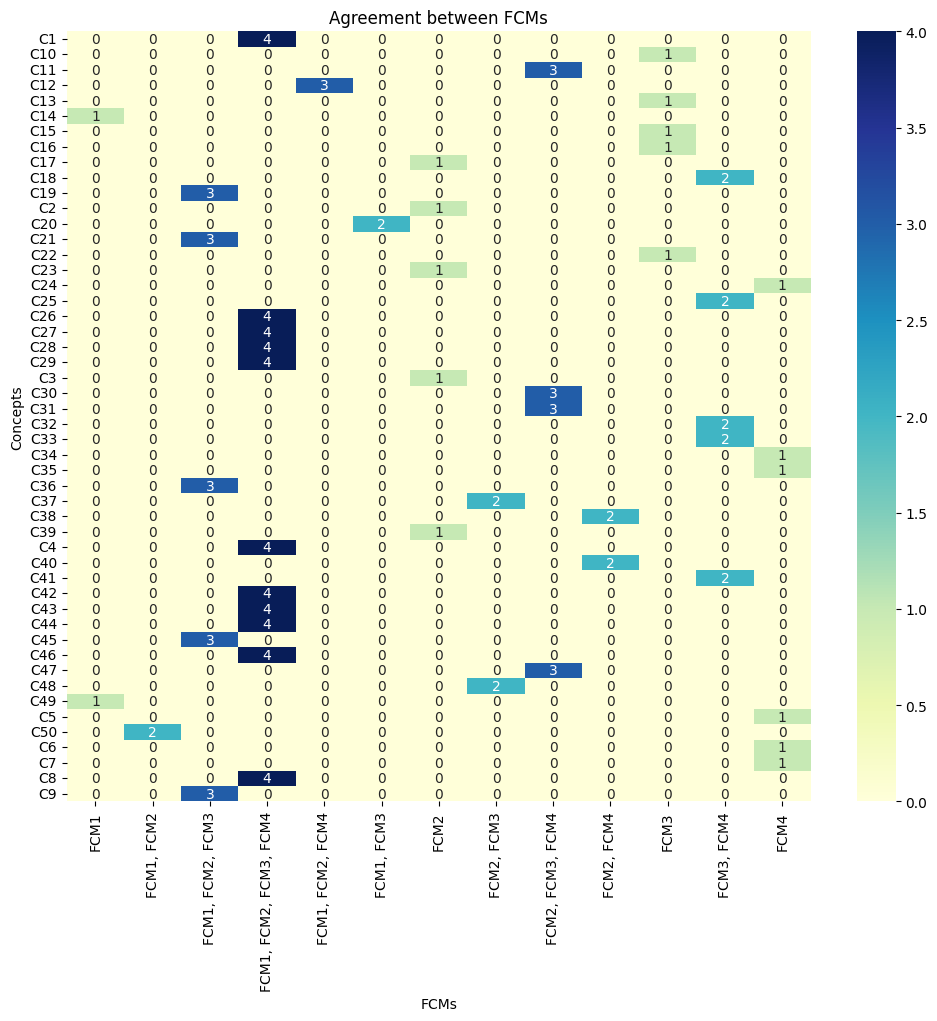

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Pivot the DataFrame to create a matrix where rows represent concepts and columns represent FCMs
concept_matrix = df_concept_frequency.pivot(index='Concept', columns='FCMs', values='Frequency').fillna(0)

# Create a heatmap to visualize the agreement between FCMs
plt.figure(figsize=(12, 10))  # Increase the figure size to accommodate all concepts
sns.heatmap(concept_matrix, cmap="YlGnBu", annot=True, fmt='g', cbar=True)
plt.title("Agreement between FCMs")
plt.xlabel("FCMs")
plt.ylabel("Concepts")
plt.show()


In [11]:
# Count the number of concepts mentioned only once across all FCMs
concepts_mentioned_once = sum(1 for concept, freq, _ in concept_frequency_sorted if freq == 1)

print("Number of concepts mentioned only once across all FCMs:", concepts_mentioned_once)

Number of concepts mentioned only once across all FCMs: 18


In [12]:
# Count the number of concepts mentioned only once across all FCMs
concepts_mentioned_once = sum(1 for concept, freq, _ in concept_frequency_sorted if freq == 1)

print("Number of concepts mentioned only once across all FCMs:", concepts_mentioned_once)
# Print the concepts mentioned only once along with their frequencies and related FCMs
print("Concepts mentioned only once across all FCMs:")
print("{:<30} {:<10} {:<}".format("Concept", "Frequency", "FCMs"))
for concept, freq, fcm_names in concept_frequency_sorted:
    if freq == 1:
        print("{:<30} {:<10} {:<}".format(concept, freq, fcm_names))

Number of concepts mentioned only once across all FCMs: 18
Concepts mentioned only once across all FCMs:
Concept                        Frequency  FCMs
C14                            1          FCM1
C49                            1          FCM1
C2                             1          FCM2
C3                             1          FCM2
C17                            1          FCM2
C23                            1          FCM2
C39                            1          FCM2
C22                            1          FCM3
C10                            1          FCM3
C13                            1          FCM3
C16                            1          FCM3
C15                            1          FCM3
C5                             1          FCM4
C6                             1          FCM4
C7                             1          FCM4
C24                            1          FCM4
C34                            1          FCM4
C35                            1          FCM4


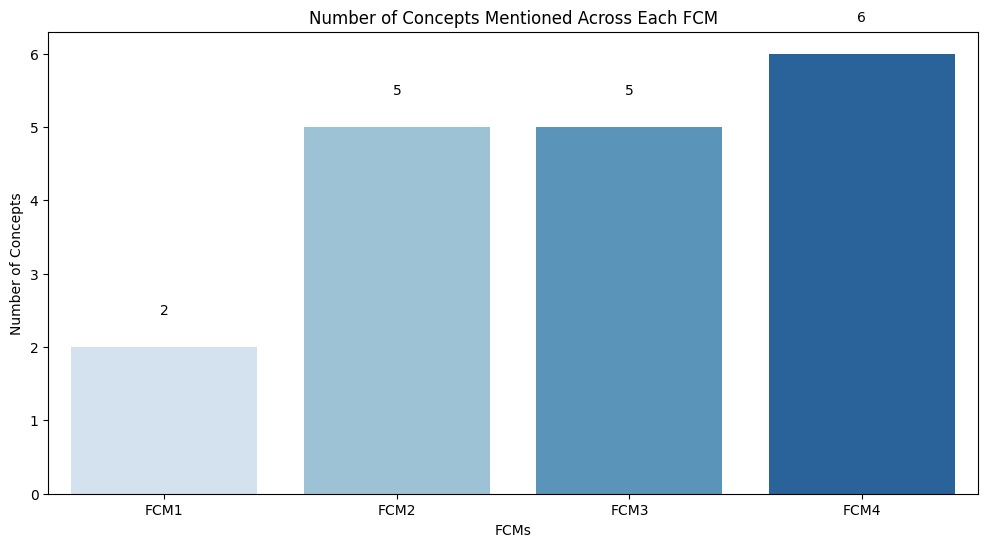

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Pivot the DataFrame to create a matrix where rows represent concepts and columns represent FCMs
concept_matrix = df_concept_frequency.pivot(index='Concept', columns='FCMs', values='Frequency').fillna(0)

# Filter concepts mentioned only once across all FCMs
concepts_mentioned_once = df_concept_frequency[df_concept_frequency['Frequency'] == 1]['Concept']

# Filter concept matrix to include only concepts mentioned once
concept_matrix_filtered = concept_matrix.loc[concepts_mentioned_once]

# Filter concept matrix to include only FCMs that have at least one mentioned concept
concept_matrix_filtered = concept_matrix_filtered.loc[:, (concept_matrix_filtered != 0).any(axis=0)]

# Replace frequencies with 1 if concept is mentioned and 0 otherwise
concept_matrix_filtered = concept_matrix_filtered.apply(lambda x: x.apply(lambda y: 1 if y > 0 else 0))

# Prepare the data for bar plot
concept_counts = concept_matrix_filtered.sum(axis=0)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=concept_counts.index, y=concept_counts.values, palette="Blues")

# Annotate each bar with the number of concepts
for index, value in enumerate(concept_counts):
    plt.text(index, value + 0.5, str(value), ha='center', va='center')

plt.title("Number of Concepts Mentioned Across Each FCM")
plt.xlabel("FCMs")
plt.ylabel("Number of Concepts")
plt.show()

# Criteria thresholds  

In [1]:
import pandas as pd

# Load concept frequency data from the CSV
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Criteria thresholds
min_maps_appearance = 2 
literature_review_concepts = ['C49', 'C48', 'C39', 'C35', 'C34', 'C24', 'C23', 'C22', 'C10', "C13", 'C14', 'C16', 'C17', 'C2', 'C3', 'C5', 'C6', 'C7']  # Replace with actual concepts from the literature review
min_centrality = 0.75

# Placeholder function to get centrality measure for a concept from FCM data
def get_centrality_from_FCM(concept):
    # Your implementation to retrieve centrality for the concept from FCM data
    # Return the centrality measure for the concept, or None if not available
    pass

# Filter concepts based on criteria
important_concepts = []
for index, row in df_concept_frequency.iterrows():
    concept = row['Concept']
    frequency = row['Frequency']
    centrality = get_centrality_from_FCM(concept)  # Function to get centrality measure for the concept from FCM data
    
    if frequency < min_maps_appearance:  # Check if frequency is less than the threshold
        important_concepts.append(concept)

# Display concepts that don't meet the first criteria (frequency threshold)
print("Concepts that don't meet the frequency threshold:")
print(df_concept_frequency[df_concept_frequency['Concept'].isin(important_concepts)])

Concepts that don't meet the frequency threshold:
   Concept  Frequency  FCMs
32     C14          1  FCM1
33     C49          1  FCM1
34      C2          1  FCM2
35      C3          1  FCM2
36     C17          1  FCM2
37     C23          1  FCM2
38     C39          1  FCM2
39     C22          1  FCM3
40     C10          1  FCM3
41     C13          1  FCM3
42     C16          1  FCM3
43     C15          1  FCM3
44      C5          1  FCM4
45      C6          1  FCM4
46      C7          1  FCM4
47     C24          1  FCM4
48     C34          1  FCM4
49     C35          1  FCM4


In [15]:
#2 check if the concepts has been mentioned in the literature review: 

In [16]:
# Filter concepts that don't meet the frequency threshold
unimportant_concepts = df_concept_frequency[df_concept_frequency['Concept'].isin(important_concepts)]

# Check if unimportant concepts are mentioned in the literature review
mentioned_in_literature = unimportant_concepts[unimportant_concepts['Concept'].isin(literature_review_concepts)]

# Print concepts mentioned in the literature review
print("Concepts mentioned in the literature review:")

print(mentioned_in_literature)

# Filter out concepts mentioned in the literature review from unimportant concepts
not_mentioned_in_literature = unimportant_concepts[~unimportant_concepts['Concept'].isin(literature_review_concepts)]

# Print concepts not mentioned in the literature review
print("Concepts not mentioned in the literature review:")
print(not_mentioned_in_literature)


Concepts mentioned in the literature review:
   Concept  Frequency  FCMs
32     C14          1  FCM1
33     C49          1  FCM1
34      C2          1  FCM2
35      C3          1  FCM2
36     C17          1  FCM2
37     C23          1  FCM2
38     C39          1  FCM2
39     C22          1  FCM3
40     C10          1  FCM3
41     C13          1  FCM3
42     C16          1  FCM3
44      C5          1  FCM4
45      C6          1  FCM4
46      C7          1  FCM4
47     C24          1  FCM4
48     C34          1  FCM4
49     C35          1  FCM4
Concepts not mentioned in the literature review:
   Concept  Frequency  FCMs
43     C15          1  FCM3


#3 check the concepts that not mentioned in the literature review, they are driver and its centrality => 0.75

In [2]:
import pandas as pd

# File path for the FCM CSV file
# Reading a csv file using pandas
df = pd.read_csv('../Original Data/EXPFCM3.csv', index_col=0)  # Assuming the first column contains row labels

# Total number of concepts
total_concepts = len(df.index)

# Total number of connections (considering any non-zero value as a connection)
total_connections = (df != 0).sum().sum()

# Indegree and Outdegree of each concept (considering any non-zero value as a connection)
indegrees = (df != 0).sum(axis=0)
outdegrees = (df != 0).sum(axis=1)

# Number of Connections per concept (considering any non-zero value as a connection)
connections_per_concept = indegrees + outdegrees

# Type of concept (driver, ordinary, receiver)
types = []
for i in range(total_concepts):
    if indegrees.iloc[i] == 0:
        types.append("Driver")
    elif outdegrees.iloc[i] == 0:
        types.append("Receiver")
    else:
        types.append("Ordinary")

# Centrality: number of connections per concept divided by total number of concepts
centrality = connections_per_concept / total_concepts

# Creating a DataFrame to store the results
results_df = pd.DataFrame({
    'Indegree': indegrees,
    'Outdegree': outdegrees,
    'Connections per Concept': connections_per_concept,
    'Type': types,
    'Centrality': centrality
})

# Extracting the type and centrality of C15
type_c15 = results_df.loc['C15', 'Type']
centrality_c15 = results_df.loc['C15', 'Centrality']


# Printing the type and centrality of C15
print(f"Type of C15: {type_c15}")
print(f"Centrality of C15: {centrality_c15}")


Type of C15: Driver
Centrality of C15: 0.030303030303030304


In [18]:
#the result : C15 will not go to aggregation process.

# The entropy

In [21]:
pip install pyfcm


Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [23]:
import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Merge DataFrames by taking the maximum value
merged_df = pd.concat(dfs, axis=1).T.groupby(level=0).max().T

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Consider all non-zero values as 1
merged_df = merged_df.apply(lambda x: x.map(lambda y: 1 if y != 0 else 0))

# Drop row 'C15' if it exists
if 'C15' in merged_df.index:
    merged_df.drop('C15', inplace=True)

# Drop column 'C15' if it exists
if 'C15' in merged_df.columns:
    merged_df.drop('C15', axis=1, inplace=True)

# Display the merged DataFrame without C15
print("Merged DataFrame without C15:")
print(merged_df)



Merged DataFrame without C15:
     C1  C10  C11  C12  C13  C14  C16  C17  C18  C19  ...  C46  C47  C48  C49  \
C4    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C21   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C19   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C12   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C9    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C14   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C20   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C27   1    0    0    0    0    0    0    0    0    0  ...    0    0    0    1   
C29   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C44   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0  

In [24]:
from collections import Counter

import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all relationships from the DataFrames
all_relationships = []
for df in dfs:
    all_relationships.extend([(row, col) for row in df.index for col in df.columns if not pd.isna(df.at[row, col]) and df.at[row, col] != 0])

# Create a Counter to count the frequency of each relationship
relationship_counter = Counter(all_relationships)

# Create a DataFrame to store the frequency of relationships
frequency_df = pd.DataFrame({'Relationship': list(relationship_counter.keys()), 'Frequency': list(relationship_counter.values())})

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Reset index for better display
frequency_df.reset_index(drop=True, inplace=True)

# Print the frequency DataFrame
print("Frequency of each relationship (excluding 0 values):")
print(frequency_df)


Frequency of each relationship (excluding 0 values):
    Relationship  Frequency
0     (C44, C29)          4
1     (C28, C27)          4
2      (C1, C29)          4
3       (C4, C1)          3
4     (C46, C45)          3
..           ...        ...
97    (C27, C32)          1
98     (C27, C1)          1
99     (C36, C4)          1
100   (C38, C36)          1
101   (C47, C33)          1

[102 rows x 2 columns]


In [25]:
import pandas as pd
from collections import Counter

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all relationships from the DataFrames
all_relationships = []
for df in dfs:
    all_relationships.extend([(row, col) for row in df.index for col in df.columns if not pd.isna(df.at[row, col])])

# Create a Counter to count the frequency of each relationship
relationship_counter = Counter(all_relationships)

# Extract unique relationships
unique_relationships = list(relationship_counter.keys())

# Dictionary to store the relationship values
relationship_values = {rel: [] for rel in unique_relationships}

# Loop through each DataFrame and extract the values for each relationship
for df in dfs:
    for rel in unique_relationships:
        value = df.at[rel[0], rel[1]] if (rel[0] in df.index and rel[1] in df.columns) else None
        relationship_values[rel].append(value)

# Filter out None values from the lists and convert to a readable format
filtered_relationship_values = {rel: [v for v in values if v is not None] for rel, values in relationship_values.items()}

# Remove relationships with all zero values
non_zero_relationship_values = {rel: values for rel, values in filtered_relationship_values.items() if not all(v == 0 for v in values)}

    # Remove relationships with all zero values
non_zero_relationship_values = {rel: values for rel, values in filtered_relationship_values.items() if any(v != 0 and v != 0.0 for v in values)}

# Print the relationship values
print("Relationship values from all FCMs (excluding those with a value of 0 or 0.0):")
for rel, values in non_zero_relationship_values.items():
    values = [v for v in values if v != 0 and v != 0.0]
    print(f"{rel} = {values}")


Relationship values from all FCMs (excluding those with a value of 0 or 0.0):
('C4', 'C1') = [1.0, 1.0, 1.0]
('C21', 'C4') = [-0.75, -1.0, -0.5]
('C19', 'C21') = [0.25, 0.5, 0.75]
('C12', 'C4') = [-1.0]
('C12', 'C21') = [0.5, 0.5]
('C9', 'C4') = [-0.25, -0.75]
('C9', 'C21') = [0.75]
('C14', 'C21') = [0.75]
('C20', 'C21') = [0.25, 0.5]
('C1', 'C29') = [0.75, 1.0, 0.75, 1.0]
('C27', 'C1') = [1.0]
('C27', 'C42') = [0.25]
('C27', 'C49') = [-0.5]
('C27', 'C8') = [1.0]
('C29', 'C27') = [0.25, 1.0, 0.75]
('C29', 'C8') = [1.0, 1.0]
('C44', 'C1') = [-0.75]
('C44', 'C29') = [0.75, 0.5, 0.75, 1.0]
('C44', 'C36') = [0.75, 0.75, 0.5]
('C43', 'C29') = [0.75]
('C43', 'C36') = [0.25, 0.75, 0.25]
('C36', 'C4') = [-0.5]
('C36', 'C27') = [-0.5]
('C36', 'C8') = [-0.75]
('C28', 'C27') = [0.25, 0.25, 0.25, 0.5]
('C42', 'C1') = [-1.0, -0.5]
('C42', 'C36') = [0.25, 0.25]
('C42', 'C8') = [-0.5, -0.75]
('C45', 'C4') = [1.0]
('C45', 'C21') = [-0.75, -1.0, -0.25]
('C45', 'C27') = [0.75]
('C45', 'C8') = [-1.0]
('C

In [26]:
# Check for relationships with both positive and negative values
contradictory_relationships = {rel: values for rel, values in non_zero_relationship_values.items() if any(v > 0 for v in values) and any(v < 0 for v in values)}

# Print the relationships with contradictory values
if not contradictory_relationships:
    print("No contradictory relationships found.")
else:
    print("Relationships with contradictory values (both positive and negative):")
    for rel, values in contradictory_relationships.items():
        print(f"{rel} = {values}")

No contradictory relationships found.


# Calculating Entropy in FCMs

In [27]:
import pandas as pd
import numpy as np
from collections import Counter

# Function to normalize the values into probabilities
def normalize(values):
    total_sum = np.sum(values)
    if total_sum == 0:
        raise ValueError("The sum of the values is zero, cannot normalize.")
    return values / total_sum

# Function to calculate entropy
def calculate_entropy(values):
    normalized_values = normalize(values)
    # Filter out zero probabilities to avoid log(0)
    probabilities = normalized_values[normalized_values > 0]
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all relationships from the DataFrames
all_relationships = []
for df in dfs:
    all_relationships.extend([(row, col) for row in df.index for col in df.columns if not pd.isna(df.at[row, col])])

# Create a Counter to count the frequency of each relationship
relationship_counter = Counter(all_relationships)

# Extract unique relationships
unique_relationships = list(relationship_counter.keys())

# Dictionary to store the relationship values
relationship_values = {rel: [] for rel in unique_relationships}

# Loop through each DataFrame and extract the values for each relationship
for df in dfs:
    for rel in unique_relationships:
        value = df.at[rel[0], rel[1]] if (rel[0] in df.index and rel[1] in df.columns) else None
        relationship_values[rel].append(value)

# Filter out None values from the lists and convert to a readable format
filtered_relationship_values = {rel: [v for v in values if v is not None] for rel, values in relationship_values.items()}

# Remove relationships with all zero values
non_zero_relationship_values = {rel: values for rel, values in filtered_relationship_values.items() if any(v != 0 and v != 0.0 for v in values)}

# Calculate and print entropy for each relationship
for rel, values in non_zero_relationship_values.items():
    # Convert list to numpy array
    values_array = np.array(values)
    if values_array.size > 0:
        try:
            entropy_value = calculate_entropy(values_array)
            print(f"Relationship: {rel} - Entropy: {entropy_value}")
        except ValueError as e:
            print(f"Relationship: {rel} - Error: {e}")
    else:
        print(f"Relationship: {rel} has no non-zero values.")


Relationship: ('C4', 'C1') - Entropy: 1.584962500721156
Relationship: ('C21', 'C4') - Entropy: 1.5304930567574824
Relationship: ('C19', 'C21') - Entropy: 1.4591479170272448
Relationship: ('C12', 'C4') - Entropy: -0.0
Relationship: ('C12', 'C21') - Entropy: 1.0
Relationship: ('C9', 'C4') - Entropy: 0.8112781244591328
Relationship: ('C9', 'C21') - Entropy: -0.0
Relationship: ('C14', 'C21') - Entropy: -0.0
Relationship: ('C20', 'C21') - Entropy: 0.9182958340544896
Relationship: ('C1', 'C29') - Entropy: 1.9852281360342512
Relationship: ('C27', 'C1') - Entropy: -0.0
Relationship: ('C27', 'C42') - Entropy: -0.0
Relationship: ('C27', 'C49') - Entropy: -0.0
Relationship: ('C27', 'C8') - Entropy: -0.0
Relationship: ('C29', 'C27') - Entropy: 1.4056390622295665
Relationship: ('C29', 'C8') - Entropy: 1.0
Relationship: ('C44', 'C1') - Entropy: -0.0
Relationship: ('C44', 'C29') - Entropy: 1.9591479170272446
Relationship: ('C44', 'C36') - Entropy: 1.561278124459133
Relationship: ('C43', 'C29') - Entr

# Visualization of Qualitative aggregation

In [30]:
import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Merge DataFrames by taking the maximum value
merged_df = pd.concat(dfs, axis=1).T.groupby(level=0).max().T

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Drop row 'C15' if it exists
if 'C15' in merged_df.index:
    merged_df.drop('C15', inplace=True)

# Drop column 'C15' if it exists
if 'C15' in merged_df.columns:
    merged_df.drop('C15', axis=1, inplace=True)

# Display the merged DataFrame without C15
print("Merged DataFrame without C15:")
print(merged_df)


Merged DataFrame without C15:
       C1  C10  C11  C12  C13  C14  C16  C17  C18  C19  ...  C46   C47   C48  \
C4   1.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C21  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C19  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C12  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C9   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C14  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C20  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C1   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C27  1.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C29  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C44  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.00  0.00   
C43  0.00 

In [32]:
import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Merge DataFrames by taking the maximum value
merged_df = pd.concat(dfs, axis=1).T.groupby(level=0).max().T

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Consider all non-zero values as 1
merged_df = merged_df.apply(lambda x: x.map(lambda y: 1 if y != 0 else 0))

# Drop row 'C15' if it exists
if 'C15' in merged_df.index:
    merged_df.drop('C15', inplace=True)

# Drop column 'C15' if it exists
if 'C15' in merged_df.columns:
    merged_df.drop('C15', axis=1, inplace=True)

# Display the merged DataFrame without C15
print("Merged DataFrame without C15:")
print(merged_df)


Merged DataFrame without C15:
     C1  C10  C11  C12  C13  C14  C16  C17  C18  C19  ...  C46  C47  C48  C49  \
C4    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C21   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C19   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C12   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C9    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C14   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C20   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C27   1    0    0    0    0    0    0    0    0    0  ...    0    0    0    1   
C29   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
C44   0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0  

In [33]:
from collections import Counter
import pandas as pd


# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]
# Extract all relationships from the DataFrames
all_relationships = []
for df in dfs:
    all_relationships.extend([(row, col) for row in df.index for col in df.columns if not pd.isna(df.at[row, col]) and df.at[row, col] != 0])

# Create a Counter to count the frequency of each relationship
relationship_counter = Counter(all_relationships)

# Create a DataFrame to store the frequency of relationships
frequency_df = pd.DataFrame({'Relationship': list(relationship_counter.keys()), 'Frequency': list(relationship_counter.values())})

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Reset index for better display
frequency_df.reset_index(drop=True, inplace=True)

# Print the frequency DataFrame
print("Frequency of each relationship (excluding 0 values):")
print(frequency_df)


Frequency of each relationship (excluding 0 values):
    Relationship  Frequency
0     (C44, C29)          4
1     (C28, C27)          4
2      (C1, C29)          4
3       (C4, C1)          3
4     (C46, C45)          3
..           ...        ...
97    (C27, C32)          1
98     (C27, C1)          1
99     (C36, C4)          1
100   (C38, C36)          1
101   (C47, C33)          1

[102 rows x 2 columns]


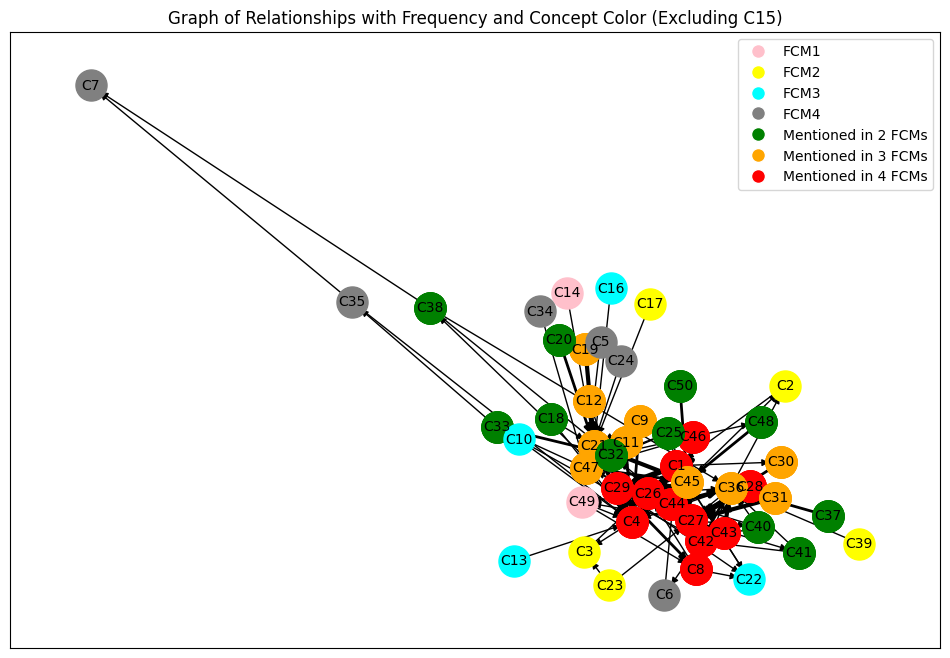

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Exclude C15 from the DataFrame
df_concept_frequency = df_concept_frequency[df_concept_frequency['Concept'] != 'C15']

# Define the order of concepts
concept_order = [f"C{i}" for i in range(1, 51)]

import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Create a dictionary to store the concept colors
concept_colors = {}

# Iterate over the concepts and assign colors based on FCMs
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:
        concept_colors[concept] = [fcm_colors[f'FCM{i+1}'] if concept in dfs[i].columns else 'gray' for i in range(len(dfs))]
    elif count == 2:
        concept_colors[concept] = ['green'] * len(dfs)  # Mentioned in two FCMs
    elif count == 3:
        concept_colors[concept] = ['orange'] * len(dfs)  # Mentioned in three FCMs
    else:
        concept_colors[concept] = ['red'] * len(dfs)  # Mentioned in all four FCMs

# Create a directed graph
G = nx.DiGraph()

# Add edges from the DataFrame with varying widths based on frequency
for index, row in frequency_df.iterrows():
    source, target = row['Relationship']
    if source != 'C15' and target != 'C15':  # Exclude C15
        weight = row['Frequency']
        G.add_edge(source, target, weight=weight)

# Set positions for the nodes using a layout algorithm
pos = nx.spring_layout(G)

# Draw the graph with varying edge widths based on frequency
plt.figure(figsize=(12, 8))

# Draw nodes with colors based on concept frequency across FCMs
for concept, colors in concept_colors.items():
    for i, color in enumerate(colors):
        if color != 'gray':
            nx.draw_networkx_nodes(G, pos, nodelist=[concept], node_color=color, node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, width=[d['weight'] for u, v, d in G.edges(data=True)])

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Show legend
legend_elements = []
for fcm, color in fcm_colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{fcm}', markerfacecolor=color, markersize=10))

# Add legend elements for other colors
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 2 FCMs', markerfacecolor='green', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 3 FCMs', markerfacecolor='orange', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 4 FCMs', markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements)
plt.title("Graph of Relationships with Frequency and Concept Color (Excluding C15)")
plt.show()


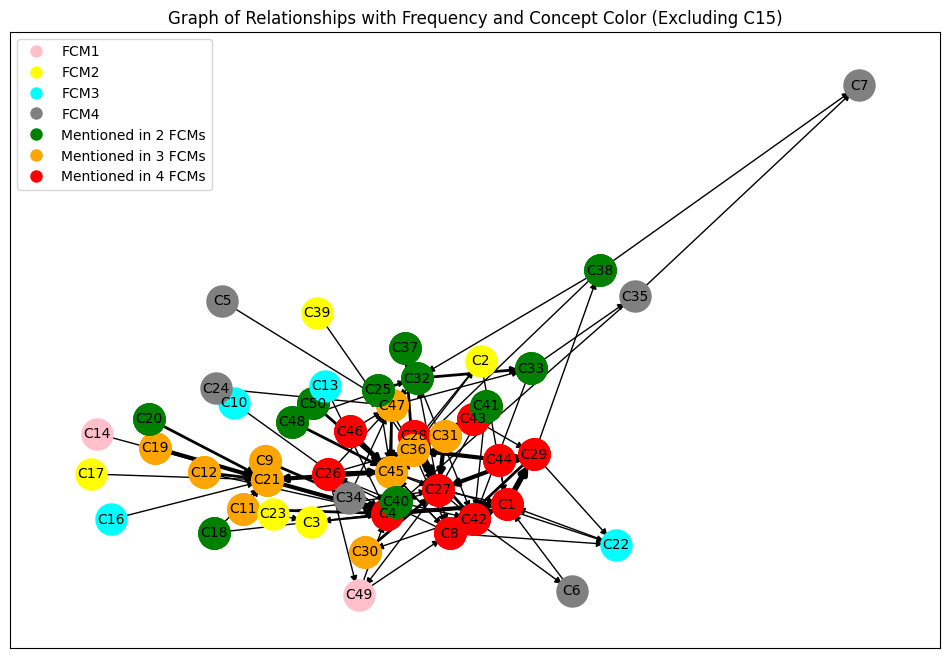

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Exclude C15 from the DataFrame
df_concept_frequency = df_concept_frequency[df_concept_frequency['Concept'] != 'C15']

# Define the order of concepts
concept_order = [f"C{i}" for i in range(1, 51)]

import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Create a dictionary to store the concept colors
concept_colors = {}

# Iterate over the concepts and assign colors based on FCMs
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:
        concept_colors[concept] = [fcm_colors[f'FCM{i+1}'] if concept in dfs[i].columns else 'gray' for i in range(len(dfs))]
    elif count == 2:
        concept_colors[concept] = ['green'] * len(dfs)  # Mentioned in two FCMs
    elif count == 3:
        concept_colors[concept] = ['orange'] * len(dfs)  # Mentioned in three FCMs
    else:
        concept_colors[concept] = ['red'] * len(dfs)  # Mentioned in all four FCMs

# Create a directed graph
G = nx.DiGraph()

# Add edges from the DataFrame with varying widths based on frequency
for index, row in frequency_df.iterrows():
    source, target = row['Relationship']
    if source != 'C15' and target != 'C15':  # Exclude C15
        weight = row['Frequency']
        G.add_edge(source, target, weight=weight)

# Set positions for the nodes using the Fruchterman-Reingold layout algorithm
pos = nx.spring_layout(G, k=0.15)

# Draw the graph with varying edge widths based on frequency
plt.figure(figsize=(12, 8))

# Draw nodes with colors based on concept frequency across FCMs
for concept, colors in concept_colors.items():
    for i, color in enumerate(colors):
        if color != 'gray':
            nx.draw_networkx_nodes(G, pos, nodelist=[concept], node_color=color, node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, width=[d['weight'] for u, v, d in G.edges(data=True)])

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Show legend
legend_elements = []
for fcm, color in fcm_colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{fcm}', markerfacecolor=color, markersize=10))

# Add legend elements for other colors
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 2 FCMs', markerfacecolor='green', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 3 FCMs', markerfacecolor='orange', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 4 FCMs', markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements)
plt.title("Graph of Relationships with Frequency and Concept Color (Excluding C15)")
plt.show()


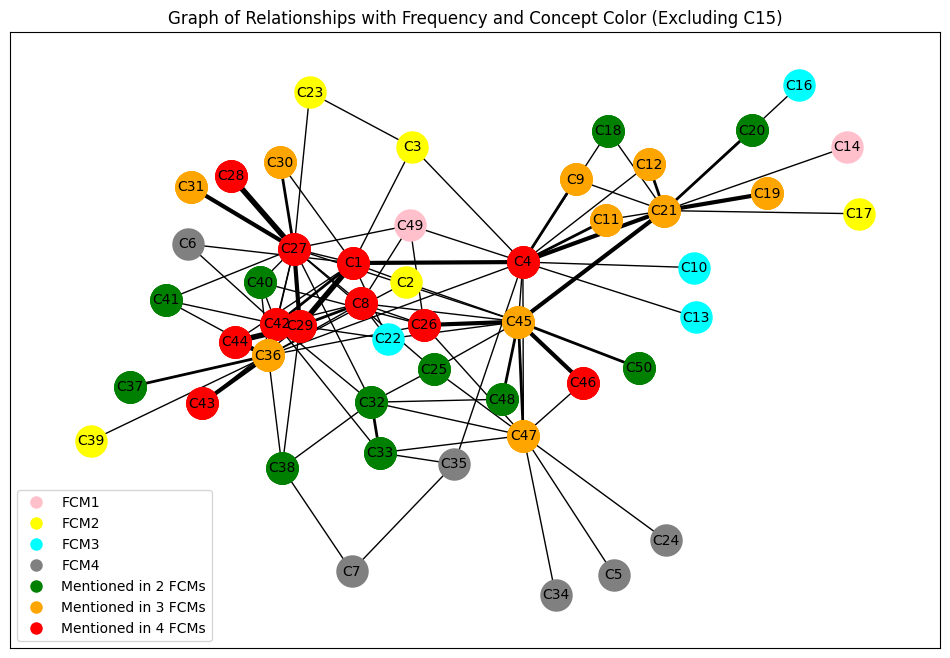

In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

# Read the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Exclude C15 from the DataFrame
df_concept_frequency = df_concept_frequency[df_concept_frequency['Concept'] != 'C15']

# Define the order of concepts
concept_order = [f"C{i}" for i in range(1, 51)]

import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Create a dictionary to store the concept colors
concept_colors = {}

# Iterate over the concepts and assign colors based on FCMs
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:
        concept_colors[concept] = [fcm_colors[f'FCM{i+1}'] if concept in dfs[i].columns else 'gray' for i in range(len(dfs))]
    elif count == 2:
        concept_colors[concept] = ['green'] * len(dfs)  # Mentioned in two FCMs
    elif count == 3:
        concept_colors[concept] = ['orange'] * len(dfs)  # Mentioned in three FCMs
    else:
        concept_colors[concept] = ['red'] * len(dfs)  # Mentioned in all four FCMs

# Create a directed graph
G = nx.DiGraph()

# Add edges from the DataFrame with varying widths based on frequency
for index, row in frequency_df.iterrows():
    source, target = row['Relationship']
    if source != 'C15' and target != 'C15':  # Exclude C15
        weight = row['Frequency']
        G.add_edge(source, target, weight=weight)

# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

# Detect communities using Louvain algorithm on the undirected graph
partition = community.best_partition(G_undirected)

# Create a layout based on community
pos = nx.spring_layout(G_undirected, pos=nx.spring_layout(G_undirected))

# Draw the graph with varying edge widths based on frequency
plt.figure(figsize=(12, 8))

# Draw nodes with colors based on concept frequency across FCMs
for concept, colors in concept_colors.items():
    for i, color in enumerate(colors):
        if color != 'gray':
            nx.draw_networkx_nodes(G_undirected, pos, nodelist=[concept], node_color=color, node_size=500)

# Draw edges
nx.draw_networkx_edges(G_undirected, pos, width=[d['weight'] for u, v, d in G_undirected.edges(data=True)])

# Draw labels
nx.draw_networkx_labels(G_undirected, pos, font_size=10)

# Show legend
legend_elements = []
for fcm, color in fcm_colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{fcm}', markerfacecolor=color, markersize=10))

# Add legend elements for other colors
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 2 FCMs', markerfacecolor='green', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 3 FCMs', markerfacecolor='orange', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 4 FCMs', markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements)
plt.title("Graph of Relationships with Frequency and Concept Color (Excluding C15)")
plt.show()


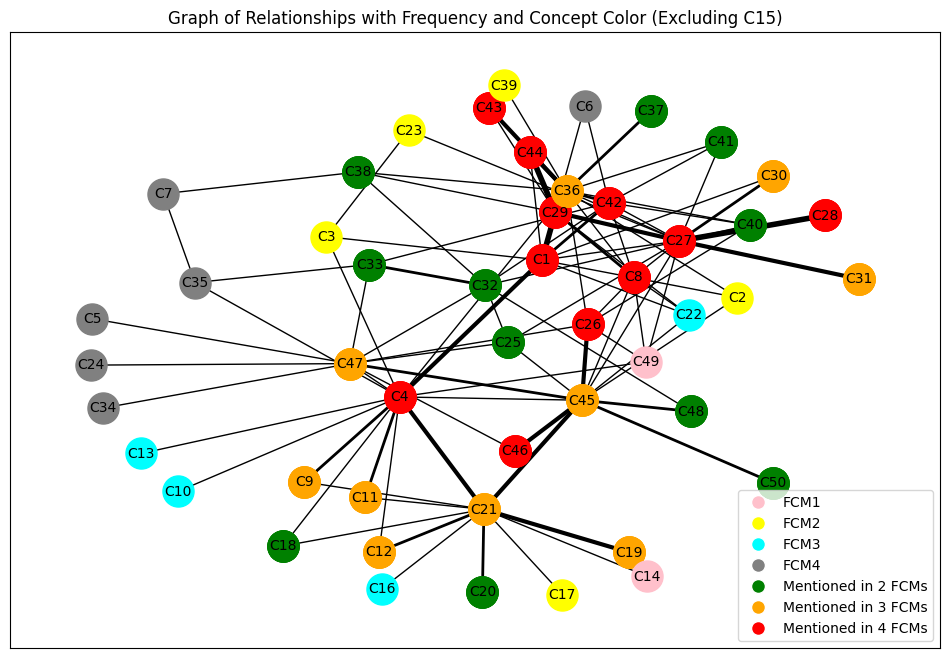

In [39]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

# Read the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Exclude C15 from the DataFrame
df_concept_frequency = df_concept_frequency[df_concept_frequency['Concept'] != 'C15']

# Define the order of concepts
concept_order = [f"C{i}" for i in range(1, 51)]

import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Create a dictionary to store the concept colors
concept_colors = {}

# Iterate over the concepts and assign colors based on FCMs
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:
        concept_colors[concept] = [fcm_colors[f'FCM{i+1}'] if concept in dfs[i].columns else 'gray' for i in range(len(dfs))]
    elif count == 2:
        concept_colors[concept] = ['green'] * len(dfs)  # Mentioned in two FCMs
    elif count == 3:
        concept_colors[concept] = ['orange'] * len(dfs)  # Mentioned in three FCMs
    else:
        concept_colors[concept] = ['red'] * len(dfs)  # Mentioned in all four FCMs

# Create a directed graph
G = nx.DiGraph()

# Add edges from the DataFrame with varying widths based on frequency
for index, row in frequency_df.iterrows():
    source, target = row['Relationship']
    if source != 'C15' and target != 'C15':  # Exclude C15
        weight = row['Frequency']
        G.add_edge(source, target, weight=weight)

# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

# Detect communities using Louvain algorithm on the undirected graph
partition = community.best_partition(G_undirected)

# Create a layout based on community
pos = nx.spring_layout(G_undirected, pos=nx.spring_layout(G_undirected), k=1.5, iterations=50)  # Increase k and iterations for larger distance between nodes

# Draw the graph with varying edge widths based on frequency
plt.figure(figsize=(12, 8))

# Draw nodes with colors based on concept frequency across FCMs
for concept, colors in concept_colors.items():
    for i, color in enumerate(colors):
        if color != 'gray':
            nx.draw_networkx_nodes(G_undirected, pos, nodelist=[concept], node_color=color, node_size=500)

# Draw edges with different widths based on the weight of the edge and arrows
weights = [d['weight'] for u, v, d in G_undirected.edges(data=True)]
nx.draw_networkx_edges(G_undirected, pos, width=weights, arrows=True)

# Draw labels
nx.draw_networkx_labels(G_undirected, pos, font_size=10)

# Show legend
legend_elements = []
for fcm, color in fcm_colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{fcm}', markerfacecolor=color, markersize=10))

# Add legend elements for other colors
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 2 FCMs', markerfacecolor='green', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 3 FCMs', markerfacecolor='orange', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 4 FCMs', markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements)
plt.title("Graph of Relationships with Frequency and Concept Color (Excluding C15)")
plt.show()


In [40]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Read the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Exclude C15 from the DataFrame
df_concept_frequency = df_concept_frequency[df_concept_frequency['Concept'] != 'C15']

# Define the order of concepts
concept_order = [f"C{i}" for i in range(1, 51)]

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Define clusters
clusters = {
    'WCHS Features': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'],
    'Economic': ['C7', 'C8'],
    'Climate Change': ['C9', 'C10', 'C11', 'C12', 'C13', 'C14'],
    'Local Weather Conditions': ['C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
    'Sustainability': ['C22'],
    'Government-Laws': ['C23', 'C24', 'C25', 'C26'],
    'Cultural and Social Usage': ['C27', 'C28', 'C29', 'C30', 'C31'],
    'Community Value': ['C32', 'C33', 'C34', 'C35'],
    'Exploitation': ['C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44'],
    'Protection Processes': ['C45', 'C46', 'C47', 'C48', 'C49', 'C50']
}

# Create a dictionary to store concept colors and check FCM coverage
concept_colors = {}
fcm_coverage = {f'FCM{i+1}': set() for i in range(len(dfs))}

for fcm_name, df in zip(fcm_coverage.keys(), dfs):
    for cluster_name, concepts in clusters.items():
        if any(concept in df.columns for concept in concepts):
            fcm_coverage[fcm_name].add(cluster_name)
    for concept in df.columns:
        if concept not in concept_colors:
            count = sum(concept in df.columns for df in dfs)
            if count == 1:
                concept_colors[concept] = fcm_colors[fcm_name]
            elif count == 2:
                concept_colors[concept] = 'green'  # Mentioned in two FCMs
            elif count == 3:
                concept_colors[concept] = 'orange'  # Mentioned in three FCMs
            else:
                concept_colors[concept] = 'red'  # Mentioned in all four FCMs

# Print FCM coverage
for fcm_name, covered_clusters in fcm_coverage.items():
    print(f"{fcm_name} covers clusters: {covered_clusters}")

FCM1 covers clusters: {'Exploitation', 'Government-Laws', 'Protection Processes', 'WCHS Features', 'Local Weather Conditions', 'Climate Change', 'Cultural and Social Usage', 'Economic'}
FCM2 covers clusters: {'Exploitation', 'Government-Laws', 'Protection Processes', 'WCHS Features', 'Local Weather Conditions', 'Climate Change', 'Cultural and Social Usage', 'Economic'}
FCM3 covers clusters: {'Exploitation', 'Government-Laws', 'Protection Processes', 'Community Value', 'WCHS Features', 'Local Weather Conditions', 'Sustainability', 'Climate Change', 'Cultural and Social Usage', 'Economic'}
FCM4 covers clusters: {'Exploitation', 'Government-Laws', 'Protection Processes', 'Community Value', 'WCHS Features', 'Local Weather Conditions', 'Climate Change', 'Cultural and Social Usage', 'Economic'}


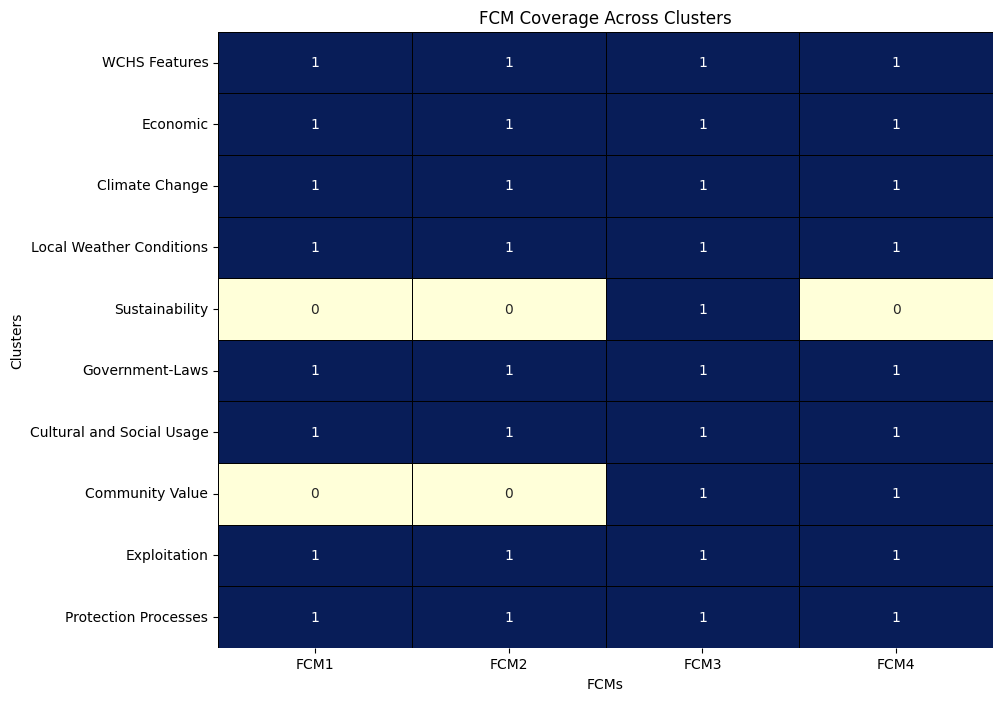

In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import community as community_louvain

# Read the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Exclude C15 from the DataFrame
df_concept_frequency = df_concept_frequency[df_concept_frequency['Concept'] != 'C15']

# Define the order of concepts
concept_order = [f"C{i}" for i in range(1, 51)]

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Define clusters
clusters = {
    'WCHS Features': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'],
    'Economic': ['C7', 'C8'],
    'Climate Change': ['C9', 'C10', 'C11', 'C12', 'C13', 'C14'],
    'Local Weather Conditions': ['C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
    'Sustainability': ['C22'],
    'Government-Laws': ['C23', 'C24', 'C25', 'C26'],
    'Cultural and Social Usage': ['C27', 'C28', 'C29', 'C30', 'C31'],
    'Community Value': ['C32', 'C33', 'C34', 'C35'],
    'Exploitation': ['C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44'],
    'Protection Processes': ['C45', 'C46', 'C47', 'C48', 'C49', 'C50']
}

# Create a dictionary to store concept colors and check FCM coverage
concept_colors = {}
fcm_coverage = {f'FCM{i+1}': set() for i in range(len(dfs))}

for fcm_name, df in zip(fcm_coverage.keys(), dfs):
    for cluster_name, concepts in clusters.items():
        if any(concept in df.columns for concept in concepts):
            fcm_coverage[fcm_name].add(cluster_name)
    for concept in df.columns:
        if concept not in concept_colors:
            count = sum(concept in df.columns for df in dfs)
            if count == 1:
                concept_colors[concept] = fcm_colors[fcm_name]
            elif count == 2:
                concept_colors[concept] = 'green'  # Mentioned in two FCMs
            elif count == 3:
                concept_colors[concept] = 'orange'  # Mentioned in three FCMs
            else:
                concept_colors[concept] = 'red'  # Mentioned in all four FCMs

# Create a coverage matrix for plotting
coverage_matrix = pd.DataFrame(0, index=clusters.keys(), columns=fcm_coverage.keys())
for fcm_name, covered_clusters in fcm_coverage.items():
    for cluster in covered_clusters:
        coverage_matrix.loc[cluster, fcm_name] = 1

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(coverage_matrix, annot=True, cmap="YlGnBu", cbar=False, linewidths=.5, linecolor='black')
plt.title("FCM Coverage Across Clusters")
plt.xlabel("FCMs")
plt.ylabel("Clusters")
plt.show()

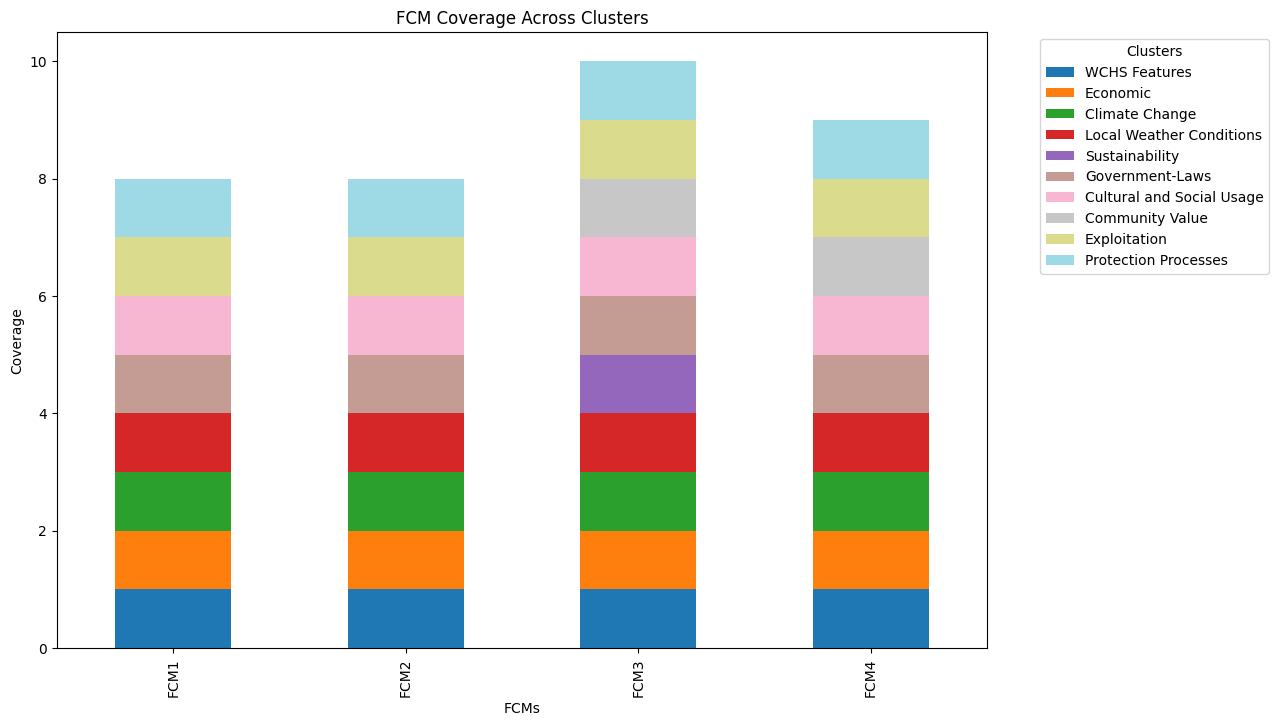

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Exclude C15 from the DataFrame
df_concept_frequency = df_concept_frequency[df_concept_frequency['Concept'] != 'C15']

# Define the order of concepts
concept_order = [f"C{i}" for i in range(1, 51)]

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Define clusters
clusters = {
    'WCHS Features': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'],
    'Economic': ['C7', 'C8'],
    'Climate Change': ['C9', 'C10', 'C11', 'C12', 'C13', 'C14'],
    'Local Weather Conditions': ['C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
    'Sustainability': ['C22'],
    'Government-Laws': ['C23', 'C24', 'C25', 'C26'],
    'Cultural and Social Usage': ['C27', 'C28', 'C29', 'C30', 'C31'],
    'Community Value': ['C32', 'C33', 'C34', 'C35'],
    'Exploitation': ['C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44'],
    'Protection Processes': ['C45', 'C46', 'C47', 'C48', 'C49', 'C50']
}

# Create a dictionary to store concept colors and check FCM coverage
concept_colors = {}
fcm_coverage = {f'FCM{i+1}': set() for i in range(len(dfs))}

for fcm_name, df in zip(fcm_coverage.keys(), dfs):
    for cluster_name, concepts in clusters.items():
        if any(concept in df.columns for concept in concepts):
            fcm_coverage[fcm_name].add(cluster_name)
    for concept in df.columns:
        if concept not in concept_colors:
            count = sum(concept in df.columns for df in dfs)
            if count == 1:
                concept_colors[concept] = fcm_colors[fcm_name]
            elif count == 2:
                concept_colors[concept] = 'green'  # Mentioned in two FCMs
            elif count == 3:
                concept_colors[concept] = 'orange'  # Mentioned in three FCMs
            else:
                concept_colors[concept] = 'red'  # Mentioned in all four FCMs

# Create a coverage matrix for plotting
coverage_matrix = pd.DataFrame(0, index=clusters.keys(), columns=fcm_coverage.keys())
for fcm_name, covered_clusters in fcm_coverage.items():
    for cluster in covered_clusters:
        coverage_matrix.loc[cluster, fcm_name] = 1

# Plot the cumulative plot
coverage_matrix.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title("FCM Coverage Across Clusters")
plt.xlabel("FCMs")
plt.ylabel("Coverage")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [43]:
# Dictionary to store clusters for concepts mentioned only once
clusters_for_single_mentions = {}

# Iterate over the concepts
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:  # Concept mentioned only once
        # Check which cluster(s) the concept belongs to
        clusters_for_single_mentions[concept] = [cluster for cluster, concepts in clusters.items() if concept in concepts]

# Print the clusters for concepts mentioned only once
print("Clusters for concepts mentioned only once:")
for concept, clusters_list in clusters_for_single_mentions.items():
    print(f"{concept}: {', '.join(clusters_list)}")


Clusters for concepts mentioned only once:
C14: Climate Change
C49: Protection Processes
C2: WCHS Features
C3: WCHS Features
C17: Local Weather Conditions
C23: Government-Laws
C39: Exploitation
C22: Sustainability
C10: Climate Change
C13: Climate Change
C16: Local Weather Conditions
C5: WCHS Features
C6: WCHS Features
C7: Economic
C24: Government-Laws
C34: Community Value
C35: Community Value


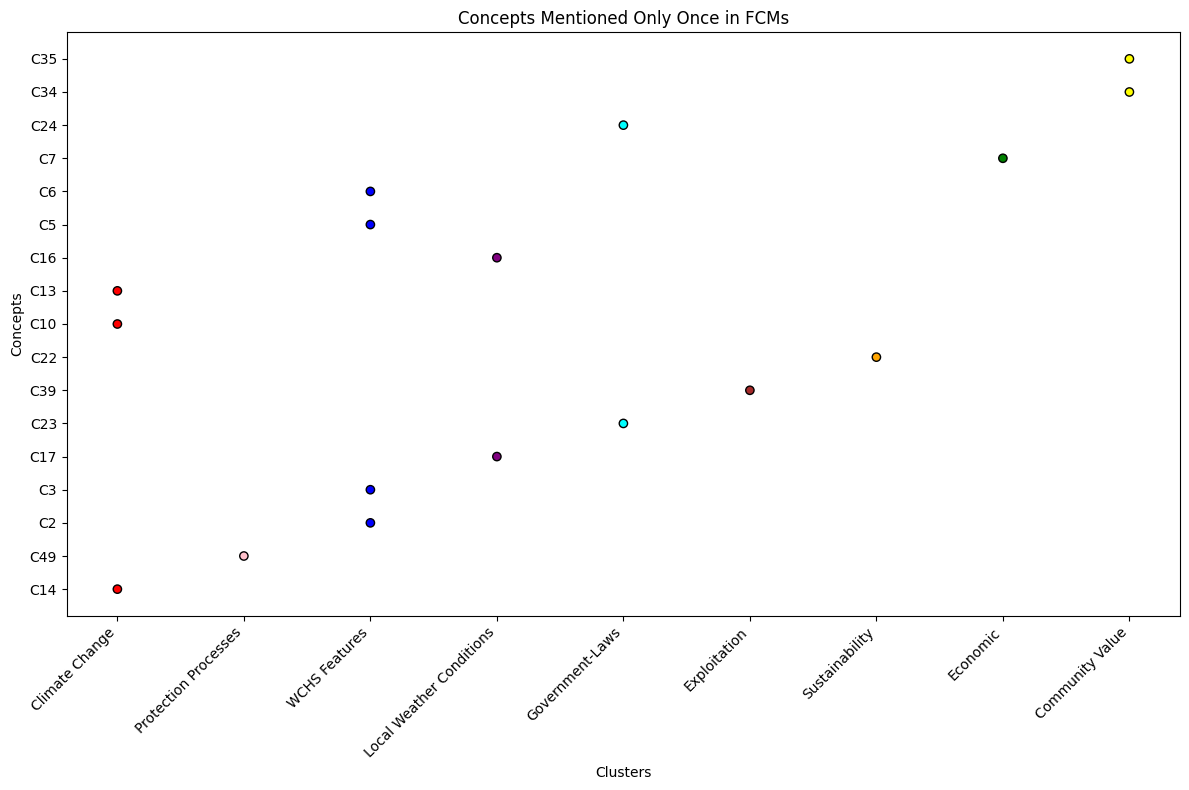

In [44]:
import matplotlib.pyplot as plt

# Dictionary to store clusters for concepts mentioned only once
clusters_for_single_mentions = {}

# Iterate over the concepts
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:  # Concept mentioned only once
        # Check which cluster(s) the concept belongs to
        clusters_for_single_mentions[concept] = [cluster for cluster, concepts in clusters.items() if concept in concepts]

# Create lists to store x and y coordinates for plotting
x_coords = []
y_coords = []

# Assign a color to each cluster
cluster_colors = {
    'WCHS Features': 'blue',
    'Economic': 'green',
    'Climate Change': 'red',
    'Local Weather Conditions': 'purple',
    'Sustainability': 'orange',
    'Government-Laws': 'cyan',
    'Cultural and Social Usage': 'magenta',
    'Community Value': 'yellow',
    'Exploitation': 'brown',
    'Protection Processes': 'pink'
}

# Iterate over the concepts and clusters
for concept, clusters_list in clusters_for_single_mentions.items():
    # Append the x coordinate (cluster) for each concept
    for cluster in clusters_list:
        x_coords.append(cluster)
        # Append the y coordinate (concept) for each cluster
        y_coords.append(concept)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(x_coords, y_coords, c=[cluster_colors[cluster] for cluster in x_coords], edgecolors='k', linewidths=1)

# Set labels and title
plt.xlabel("Clusters")
plt.ylabel("Concepts")
plt.title("Concepts Mentioned Only Once in FCMs")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

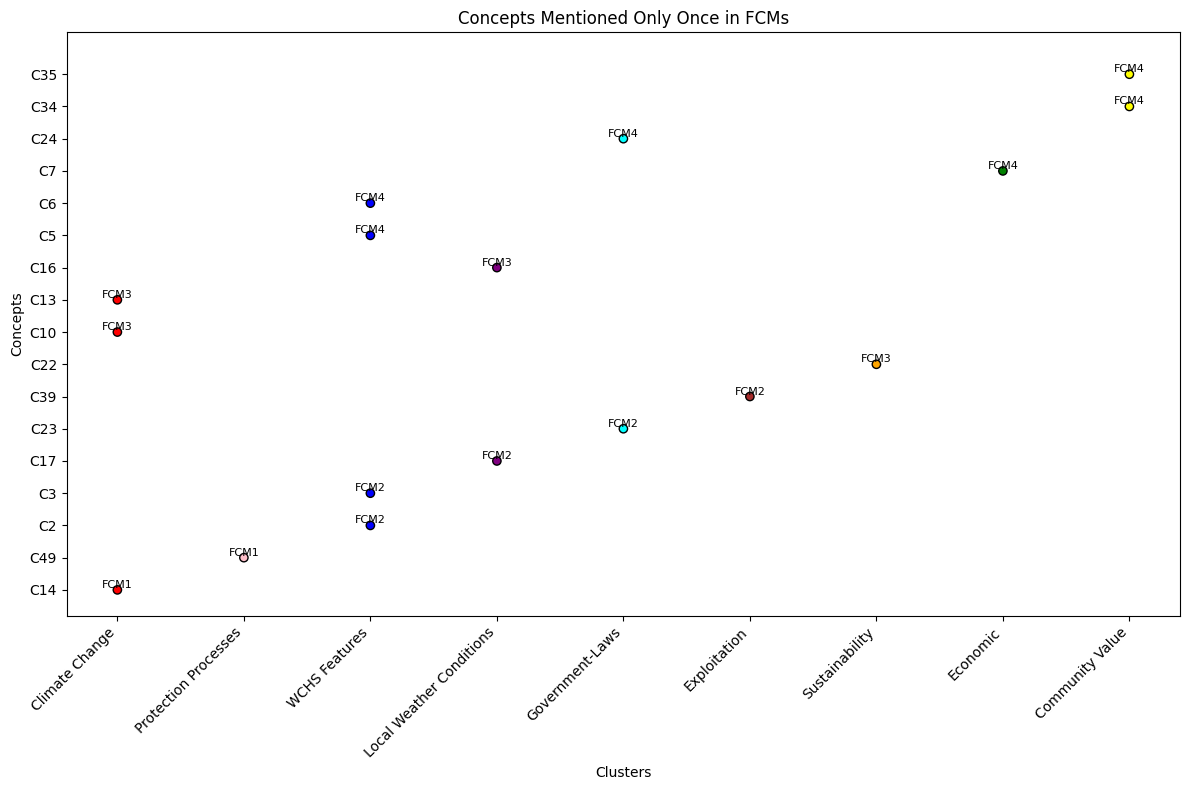

In [45]:
import matplotlib.pyplot as plt

# Dictionary to store clusters for concepts mentioned only once
clusters_for_single_mentions = {}

# Iterate over the concepts
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:  # Concept mentioned only once
        # Check which cluster(s) the concept belongs to
        clusters_for_single_mentions[concept] = [cluster for cluster, concepts in clusters.items() if concept in concepts]

# Create lists to store x and y coordinates for plotting
x_coords = []
y_coords = []

# Assign a color to each cluster
cluster_colors = {
    'WCHS Features': 'blue',
    'Economic': 'green',
    'Climate Change': 'red',
    'Local Weather Conditions': 'purple',
    'Sustainability': 'orange',
    'Government-Laws': 'cyan',
    'Cultural and Social Usage': 'magenta',
    'Community Value': 'yellow',
    'Exploitation': 'brown',
    'Protection Processes': 'pink'
}

# Create a dictionary to store the source FCM for each concept
concept_sources = {}

# Iterate over the concepts and clusters
for concept, clusters_list in clusters_for_single_mentions.items():
    # Append the x coordinate (cluster) for each concept
    for cluster in clusters_list:
        x_coords.append(cluster)
        # Append the y coordinate (concept) for each cluster
        y_coords.append(concept)
        # Find the source FCM for the concept
        for i, df in enumerate(dfs):
            if concept in df.columns:
                concept_sources[concept] = f'FCM{i+1}'
                break

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_coords, y_coords, c=[cluster_colors[cluster] for cluster in x_coords], edgecolors='k', linewidths=1)

# Add text annotations for FCM sources above the circles
for i, concept in enumerate(y_coords):
    plt.text(x_coords[i], concept, concept_sources.get(concept, ''), fontsize=8, ha='center', va='bottom')

# Set labels and title
plt.xlabel("Clusters")
plt.ylabel("Concepts")
plt.title("Concepts Mentioned Only Once in FCMs")

# Adjust the y-axis limits to make room for labels above the circles
plt.ylim(plt.ylim()[0], plt.ylim()[1] + 0.5)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


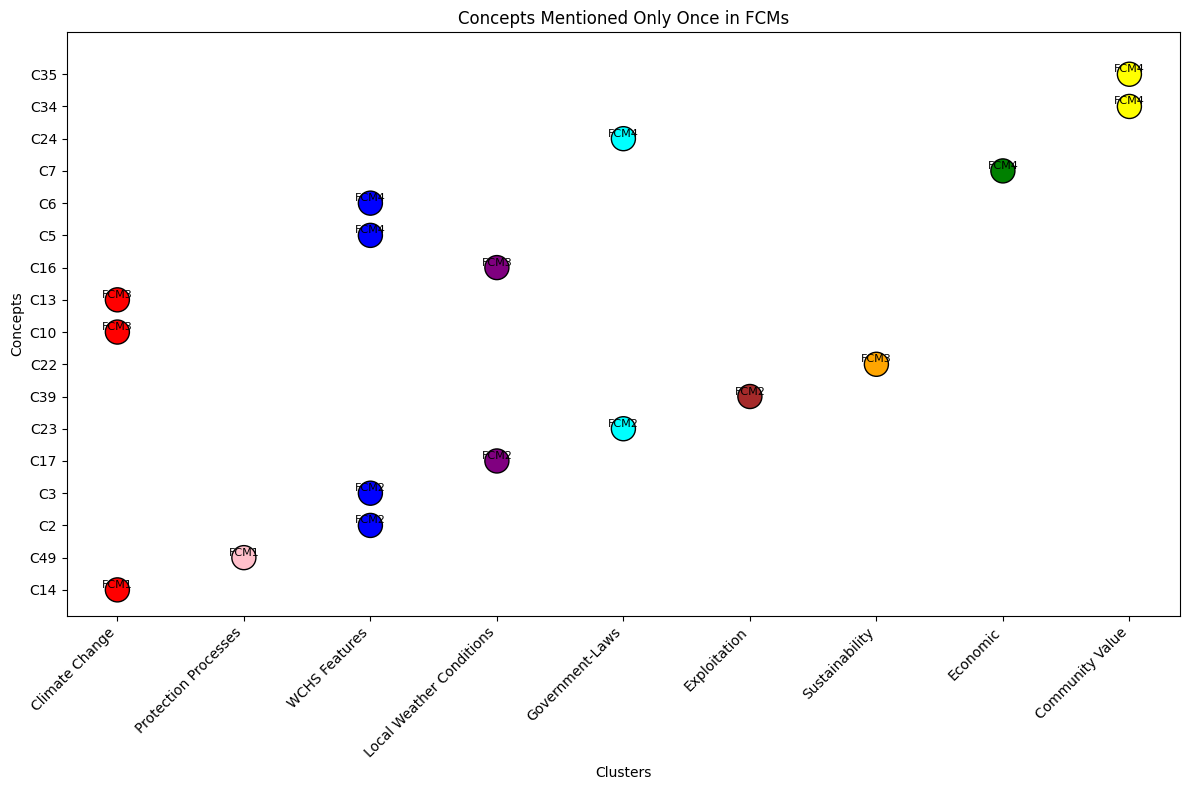

In [46]:
import matplotlib.pyplot as plt

# Dictionary to store clusters for concepts mentioned only once
clusters_for_single_mentions = {}

# Iterate over the concepts
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:  # Concept mentioned only once
        # Check which cluster(s) the concept belongs to
        clusters_for_single_mentions[concept] = [cluster for cluster, concepts in clusters.items() if concept in concepts]

# Create lists to store x and y coordinates for plotting
x_coords = []
y_coords = []

# Assign a color to each cluster
cluster_colors = {
    'WCHS Features': 'blue',
    'Economic': 'green',
    'Climate Change': 'red',
    'Local Weather Conditions': 'purple',
    'Sustainability': 'orange',
    'Government-Laws': 'cyan',
    'Cultural and Social Usage': 'magenta',
    'Community Value': 'yellow',
    'Exploitation': 'brown',
    'Protection Processes': 'pink'
}

# Create a dictionary to store the source FCM for each concept
concept_sources = {}

# Iterate over the concepts and clusters
for concept, clusters_list in clusters_for_single_mentions.items():
    # Append the x coordinate (cluster) for each concept
    for cluster in clusters_list:
        x_coords.append(cluster)
        # Append the y coordinate (concept) for each cluster
        y_coords.append(concept)
        # Find the source FCM for the concept
        for i, df in enumerate(dfs):
            if concept in df.columns:
                concept_sources[concept] = f'FCM{i+1}'
                break

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_coords, y_coords, c=[cluster_colors[cluster] for cluster in x_coords], edgecolors='k', linewidths=1, s=300)

# Add text annotations for FCM sources above the circles
for i, concept in enumerate(y_coords):
    plt.text(x_coords[i], concept, concept_sources.get(concept, ''), fontsize=8, ha='center', va='bottom')

# Set labels and title
plt.xlabel("Clusters")
plt.ylabel("Concepts")
plt.title("Concepts Mentioned Only Once in FCMs")

# Adjust the y-axis limits to make room for labels above the circles
plt.ylim(plt.ylim()[0], plt.ylim()[1] + 0.5)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# STEP 3: quantitative aggregation
Fuzzy Cognitive Maps enable the straightforward consolidation of knowledge acquired from multiple experts. 
The purpose of aggregating FCMs is to enhance the reliability of the ultimate model, making it less vulnerable to potentially incorrect beliefs held by a single expert. There are several methods for merging multiple FCMs into a unified, ultimate model. The process includes basic matrix manipulations, such as additions and scalar multiplications (Kosko, 1988), which are performed using distinct connection matrices created by various experts. It is not unusual for experts to arrive at a varying number of concepts.
 As a result, the sizes of the matrices may not be equal and/or the rows/columns may refer to different concepts. To aggregate maps, the initial step is to standardize their sizes.



# 1.	Augmentation :
refers to the process of combining individual matrices to create a single matrix that represents the FCM. The connection matrix is expanded, if needed, by adding any absent concept(s) that are present in other maps. This is done by inserting additional rows and columns in the connection matrix, which are filled with zeros. Put simply, additional "dummy" concepts are incorporated into the model. According to Khan and Quaddus (2004), if the total number of unique concepts for all input FCMs is N, then each individual connection matrix is expanded to a matrix of size N×N. As a result, every individual map has identical dimensions.

#To ensure that all FCMs have the same number of concepts and the same rows and columns, we can follow these steps:

#1. Identify the unique set of concepts across all FCMs.
#2. Create a new DataFrame for each FCM with the complete set of concepts.
#3. Fill in the missing values with zeros for concepts that do not exist in the original FCMs.


In [47]:
import pandas as pd

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Set to store unique concepts
unique_concepts = set()

# Load each FCM and extract unique concepts
for file_path in file_paths:
    df = pd.read_csv(file_path, index_col=0)
    unique_concepts.update(df.index)
    unique_concepts.update(df.columns)

# Calculate the total number of unique concepts
total_unique_concepts = len(unique_concepts)

# List to store all relationships
all_relationships = []

# Load each FCM and extract all relationships
for file_path in file_paths:
    df = pd.read_csv(file_path, index_col=0)
    all_relationships.extend((source, target) for source in df.index for target in df.columns if df.at[source, target] != 0)

# Calculate the total number of existing relationships
total_existing_relationships = len(all_relationships)

# Print the total number of unique concepts
print("Total number of unique concepts:", total_unique_concepts)

# Print the total number of existing relationships
print("Total number of existing relationships over all FCMs:", total_existing_relationships)



Total number of unique concepts: 50
Total number of existing relationships over all FCMs: 145


In [48]:
import pandas as pd


# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]
df_names = [f"FCM{i+1}" for i in range(len(file_paths))]

# Extract all concepts from the DataFrames
all_concepts = []
for df in dfs:
    all_concepts.extend(df.index)
    all_concepts.extend(df.columns)
all_concepts = list(set(all_concepts))

# Create a new DataFrame for each FCM with the complete set of concepts
augmented_dfs = []
for df in dfs:
    augmented_df = pd.DataFrame(index=all_concepts, columns=all_concepts)
    augmented_df.update(df)
    augmented_dfs.append(augmented_df)

# Fill in missing values with zeros
for df in augmented_dfs:
    df.fillna(0, inplace=True)

# Print the augmented DataFrames
for name, df in zip(df_names, augmented_dfs):
    print(f"Augmented {name}:")
    print(df)
    print()

Augmented FCM1:
     C47  C7   C29  C46  C2   C21  C42  C33  C5  C31  ...  C45  C38  C40  \
C47    0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C7     0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C29    0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C46    0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  1.0    0    0   
C2     0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C21    0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C42    0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C33    0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C5     0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C31    0   0  0.00  0.0   0  0.00  0.0    0   0    0  ...  0.0    0    0   
C19    0   0  0.00  0.0   0  0.25  0.0    0   0    0  ...  0.0    0    0   
C9     0   0  0.00  0.0   0  0.75  0.0    0   0    0  ...  0.0    0    0

In [49]:
import pandas as pd
import os

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]
df_names = [f"FCM{i+1}" for i in range(len(file_paths))]

# Extract all concepts from the DataFrames
all_concepts = []
for df in dfs:
    all_concepts.extend(df.index)
    all_concepts.extend(df.columns)
all_concepts = list(set(all_concepts))

# Create a new DataFrame for each FCM with the complete set of concepts
augmented_dfs = []
for df in dfs:
    augmented_df = pd.DataFrame(index=all_concepts, columns=all_concepts)
    augmented_df.update(df)
    augmented_dfs.append(augmented_df)

# Fill in missing values with zeros
for df in augmented_dfs:
    df.fillna(0, inplace=True)

# Ensure the output directory exists
output_dir = 'Analysis and output folders'
os.makedirs(output_dir, exist_ok=True)

# Save the augmented DataFrames as CSV files
for i, (name, df) in enumerate(zip(df_names, augmented_dfs), start=1):
    output_file_path = os.path.join(output_dir, f'{name}_augmented.csv')
    df.to_csv(output_file_path, index=True)
    print(f"Augmented {name} saved as {name}_augmented.csv")


Augmented FCM1 saved as FCM1_augmented.csv
Augmented FCM2 saved as FCM2_augmented.csv
Augmented FCM3 saved as FCM3_augmented.csv
Augmented FCM4 saved as FCM4_augmented.csv


# 2.	Normalization: 
Once the combined FCM is obtained, each element of the adjacency matrix is subjected to normalization. The normalization process is conducted by considering the number of experts who have approved each element and their decisional weight. The initial method to combine FCMs was introduced by Kosko in 1988. The process involves calculating the mean value of each relationship across multiple maps. Thus, the connection matrix of the ultimate FCM is formed using basic matrix operations:


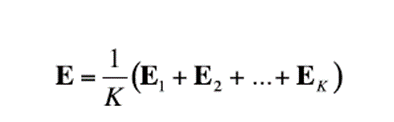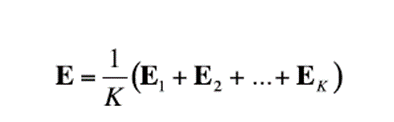

The connection matrix of the aggregated model is denoted as E, while Ek represents the connection matrix of the model developed by the kth expert. K refers to the total number of experts. This method only necessitates familiarity with the input connection matrices and does not require any supplementary information.


In [50]:
import pandas as pd
import numpy as np
import os

# List of file paths
file_paths = ['Analysis and output folders/FCM1_augmented.csv', 'Analysis and output folders/FCM2_augmented.csv', 'Analysis and output folders/FCM4_augmented.csv']

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all unique concepts from all FCMs
all_concepts = set()
for df in dfs:
    all_concepts.update(df.index)
    all_concepts.update(df.columns)

# Convert all_concepts to a list and sort it
all_concepts = sorted(list(all_concepts))

# Create a merged DataFrame to store the relationship values
merged_matrix = pd.DataFrame(index=all_concepts, columns=all_concepts)

# Iterate through all pairs of concepts
for concept1 in all_concepts:
    for concept2 in all_concepts:
        # Skip if both concepts are the same
        if concept1 == concept2:
            continue
        
        # Collect values for this pair of concepts from all FCMs
        values = []
        for df in dfs:
            if concept1 in df.index and concept2 in df.columns:
                value = df.at[concept1, concept2]
                if not np.isnan(value):
                    values.append(value)
        
        # Calculate the average value considering both positive and negative values
        if values:
            avg_value = sum(values) / len(values)
            merged_matrix.at[concept1, concept2] = avg_value

# Handle missing values, if any
merged_matrix.fillna(0, inplace=True)  # Fill missing values with 0

# Reorder rows and columns
merged_matrix = merged_matrix.reindex(all_concepts, axis=0)
merged_matrix = merged_matrix.reindex(all_concepts, axis=1)

# Ensure the output directory exists
output_dir = 'Analysis and output folders'
os.makedirs(output_dir, exist_ok=True)

# Save the merged matrix to a new CSV file
output_file_path = os.path.join(output_dir, "Merged_Matrix.csv")
merged_matrix.to_csv(output_file_path)

# Display the merged matrix
print("Merged Matrix:")
print(merged_matrix)


Merged Matrix:
           C1  C10  C11  C12  C13  C14  C15  C16  C17  C18  ...  C46  \
C1   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C10  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C11  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C12  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C13  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C14  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C15  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C16  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C17  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C18  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C19  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C2   0.333333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C20  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [51]:
import pandas as pd
import numpy as np


# List of file paths
file_paths = ['Analysis and output folders/FCM1_augmented.csv', 'Analysis and output folders/FCM2_augmented.csv', 'Analysis and output folders/FCM4_augmented.csv']

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all unique concepts from all FCMs
all_concepts = set()
for df in dfs:
    all_concepts.update(df.index)
    all_concepts.update(df.columns)

# Convert all_concepts to a list and sort it
all_concepts = sorted(list(all_concepts))

# Create a merged DataFrame to store the relationship values
merged_matrix = pd.DataFrame(index=all_concepts, columns=all_concepts)

# Iterate through all pairs of concepts
for concept1 in all_concepts:
    for concept2 in all_concepts:
        # Skip if both concepts are the same
        if concept1 == concept2:
            continue
        
        # Collect values for this pair of concepts from all FCMs
        values = []
        for df in dfs:
            if concept1 in df.index and concept2 in df.columns:
                value = df.at[concept1, concept2]
                if not np.isnan(value):
                    values.append(value)
        
        # Calculate the average value considering both positive and negative values
        if len(values) > 0:
            avg_value = sum(values) / len(values)
            merged_matrix.at[concept1, concept2] = avg_value

# Handle missing values, if any
merged_matrix.fillna(0, inplace=True)  # Fill missing values with 0

# Reorder rows and columns
merged_matrix = merged_matrix.reindex(all_concepts, axis=0)
merged_matrix = merged_matrix.reindex(all_concepts, axis=1)


# Ensure the output directory exists
output_dir = 'Analysis and output folders'
os.makedirs(output_dir, exist_ok=True)

# Save the merged matrix to a new CSV file
output_file_path = os.path.join(output_dir, "Merged_Matrix.csv")
merged_matrix.to_csv(output_file_path)

# Display the merged matrix
print("Merged Matrix:")
print(merged_matrix)


Merged Matrix:
           C1  C10  C11  C12  C13  C14  C15  C16  C17  C18  ...  C46  \
C1   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C10  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C11  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C12  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C13  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C14  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C15  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C16  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C17  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C18  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C19  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C2   0.333333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
C20  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

# 3.	The final aggregated FCM 
is the result that encompasses the collective knowledge or opinions of all experts involved in the process. This FCM integrates the expertise and perspectives of multiple individuals, leading to a more thorough comprehension of the subject area under investigation.

In [52]:
# Create an empty DataFrame to store the merged matrix
merged_matrix = pd.DataFrame(index=all_concepts, columns=all_concepts)

# Iterate through all pairs of concepts
for concept1 in all_concepts:
    for concept2 in all_concepts:
        # Skip if both concepts are the same
        if concept1 == concept2:
            continue
        
        # Collect values for this pair of concepts from all FCMs
        values = []
        frequencies = 0
        for df in dfs:
            if concept1 in df.index and concept2 in df.columns:
                value = df.at[concept1, concept2]
                if not pd.isna(value) and value != 0:
                    values.append(value)
                    frequencies += 1
        
        # Calculate the average value considering both positive and negative values
        if len(values) > 0:
            avg_value = sum(values) / frequencies
            merged_matrix.at[concept1, concept2] = avg_value

# Handle missing values, if any
merged_matrix.fillna(0, inplace=True)  # Fill missing values with 0

# Display the merged matrix
print("Merged Matrix:")
print(merged_matrix)


Merged Matrix:
       C1  C10  C11  C12  C13  C14  C15  C16  C17  C18  ...  C46   C47  C48  \
C1   0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C10  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C11  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C12  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C13  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C14  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C15  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C16  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C17  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C18  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C19  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C2   1.00    0    0    0    0    0   

In [53]:
import pandas as pd
import numpy as np
import os

# List of file paths for the augmented FCMs
file_paths = ['Analysis and output folders/FCM1_augmented.csv', 'Analysis and output folders/FCM2_augmented.csv', 'Analysis and output folders/FCM4_augmented.csv']

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all unique concepts from all FCMs
all_concepts = set()
for df in dfs:
    all_concepts.update(df.index)
    all_concepts.update(df.columns)

# Convert all_concepts to a list and sort it
all_concepts = sorted(list(all_concepts))

# Filter out 'C15' from the list of all concepts
all_concepts_filtered = [concept for concept in all_concepts if concept != 'C15']

# Create an empty DataFrame to store the merged matrix
merged_matrix = pd.DataFrame(index=all_concepts_filtered, columns=all_concepts_filtered)

# Iterate through all pairs of concepts
for concept1 in all_concepts_filtered:
    for concept2 in all_concepts_filtered:
        # Collect values for this pair of concepts from all FCMs
        values = []
        frequencies = 0
        for df in dfs:
            if concept1 in df.index and concept2 in df.columns:
                value = df.at[concept1, concept2]
                if not pd.isna(value) and value != 0:
                    values.append(value)
                    frequencies += 1
        
        # Calculate the average value considering both positive and negative values
        if len(values) > 0:
            avg_value = sum(values) / frequencies
            merged_matrix.at[concept1, concept2] = avg_value

# Handle missing values, if any
merged_matrix.fillna(0, inplace=True)  # Fill missing values with 0

# Define the file path for saving the merged matrix
output_file_path = os.path.join('Analysis and output folders', "Final_merge.csv")

# Ensure the output directory exists
os.makedirs('Analysis and output folders', exist_ok=True)

# Save the merged matrix to a new CSV file
merged_matrix.to_csv(output_file_path)

# Display the merged matrix
print("Final Matrix:")
print(merged_matrix)


Final Matrix:
       C1  C10  C11  C12  C13  C14  C16  C17  C18  C19  ...  C46   C47  C48  \
C1   0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C10  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C11  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C12  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C13  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C14  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C16  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C17  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C18  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C19  0.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C2   1.00    0    0    0    0    0    0    0    0    0  ...    0  0.00    0   
C20  0.00    0    0    0    0    0    

# Visualization of Quantitative aggregation

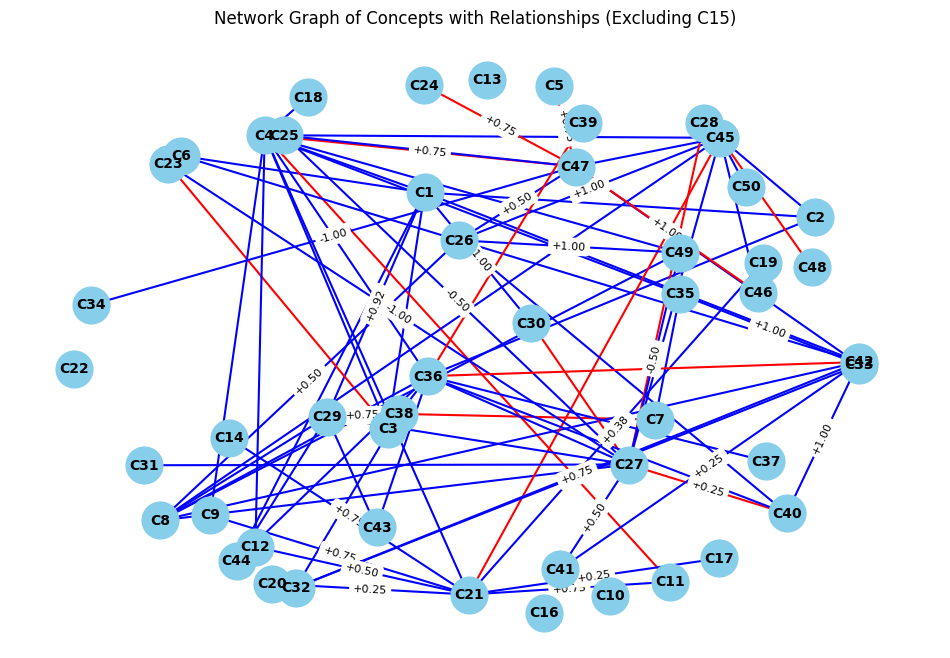

In [54]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the order of concepts (C1, C2, ..., C50) excluding C15
concept_order = [f"C{i}" for i in range(1, 51) if f"C{i}" != 'C15']


# File paths for FCM CSV files
file_paths = ['Analysis and output folders/Final_merge.csv' for i in range(1, 5)]


# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Merge all FCMs into one DataFrame
merged_df = pd.concat(dfs, axis=0, keys=[f"FCM{i+1}" for i in range(len(dfs))])

# Initialize an empty DataFrame for the final merged FCM
final_merged_df = pd.DataFrame(index=concept_order, columns=concept_order)

# Calculate the mean of non-zero values for each cell across all FCMs
for row in final_merged_df.index:
    for col in final_merged_df.columns:
        values = [df.loc[row, col] for df in dfs if row in df.index and col in df.columns and df.loc[row, col] != 0]
        if values:
            final_merged_df.at[row, col] = np.mean(values)

# Fill NaN values with 0
final_merged_df.fillna(0, inplace=True)

# Create a graph from the final merged FCM, excluding C15
G = nx.from_pandas_adjacency(final_merged_df.reindex(concept_order, axis=0).reindex(concept_order, axis=1))

# Draw the graph
plt.figure(figsize=(12, 8))

# Adjust the node positions using the spring layout with fixed node positions
pos = nx.spring_layout(G, seed=42, k=1.5, iterations=50, pos=nx.spring_layout(G, seed=42, k=1.5, iterations=50))

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with edge labels and colors based on their sign
edge_labels = {}
edge_colors = []
for u, v, data in G.edges(data=True):
    if final_merged_df.loc[u, v] > 0:
        edge_labels[(u, v)] = f'+{final_merged_df.loc[u, v]:.2f}'
        edge_colors.append('blue')
    elif final_merged_df.loc[u, v] < 0:
        edge_labels[(u, v)] = f'-{abs(final_merged_df.loc[u, v]):.2f}'
        edge_colors.append('red')

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title('Network Graph of Concepts with Relationships (Excluding C15)')
plt.axis('off')  # Turn off axis
plt.show()


In [55]:

# Calculate degree of each node
degree = dict(G.degree())
print("Degree of each node:", degree)

# Calculate centrality metrics
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)

Degree of each node: {'C1': 8, 'C2': 3, 'C3': 3, 'C4': 12, 'C5': 1, 'C6': 2, 'C7': 2, 'C8': 7, 'C9': 2, 'C10': 0, 'C11': 2, 'C12': 2, 'C13': 0, 'C14': 1, 'C16': 0, 'C17': 1, 'C18': 1, 'C19': 1, 'C20': 1, 'C21': 9, 'C22': 0, 'C23': 2, 'C24': 1, 'C25': 2, 'C26': 5, 'C27': 12, 'C28': 1, 'C29': 6, 'C30': 2, 'C31': 1, 'C32': 3, 'C33': 3, 'C34': 1, 'C35': 3, 'C36': 11, 'C37': 1, 'C38': 4, 'C39': 1, 'C40': 4, 'C41': 2, 'C42': 7, 'C43': 2, 'C44': 3, 'C45': 10, 'C46': 2, 'C47': 9, 'C48': 1, 'C49': 4, 'C50': 1}
Betweenness Centrality: {'C1': 0.07380530226274906, 'C2': 0.008017772711921646, 'C3': 0.012124282337048292, 'C4': 0.3003092283012495, 'C5': 0.0, 'C6': 0.0, 'C7': 0.0013297872340425532, 'C8': 0.03540822357311719, 'C9': 0.0, 'C10': 0.0, 'C11': 0.0, 'C12': 0.0, 'C13': 0.0, 'C14': 0.0, 'C16': 0.0, 'C17': 0.0, 'C18': 0.0, 'C19': 0.0, 'C20': 0.0, 'C21': 0.15780141843971632, 'C22': 0.0, 'C23': 0.00398936170212766, 'C24': 0.0, 'C25': 0.011894208037825059, 'C26': 0.015152186761229312, 'C27': 0.174

# Merge Patterns, Quantitative aggregation & Quantitative aggregation

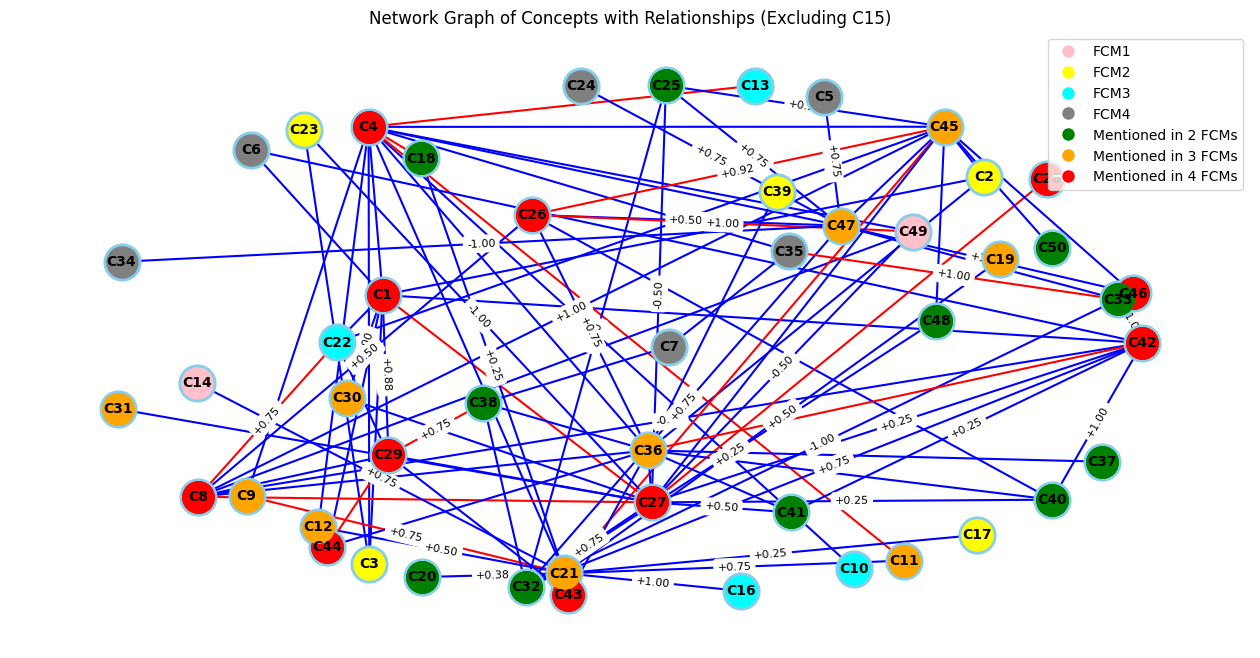

In [68]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community

# Define the order of concepts (C1, C2, ..., C50) excluding C15
concept_order = [f"C{i}" for i in range(1, 51) if f"C{i}" != 'C15']

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Merge all FCMs into one DataFrame
merged_df = pd.concat(dfs, axis=0, keys=[f"FCM{i+1}" for i in range(len(dfs))])

# Initialize an empty DataFrame for the final merged FCM
final_merged_df = pd.DataFrame(index=concept_order, columns=concept_order)

# Calculate the mean of non-zero values for each cell across all FCMs
for row in final_merged_df.index:
    for col in final_merged_df.columns:
        values = [df.loc[row, col] for df in dfs if row in df.index and col in df.columns and df.loc[row, col] != 0]
        if values:
            final_merged_df.at[row, col] = np.mean(values)

# Fill NaN values with 0
final_merged_df.fillna(0, inplace=True)

# Create a graph from the final merged FCM, excluding C15
G = nx.from_pandas_adjacency(final_merged_df.reindex(concept_order, axis=0).reindex(concept_order, axis=1))

# Read the concept frequency data
df_concept_frequency = pd.read_csv("concept_frequency_across_fcms.csv")

# Exclude C15 from the DataFrame
df_concept_frequency = df_concept_frequency[df_concept_frequency['Concept'] != 'C15']

# Define the order of concepts
concept_order = [f"C{i}" for i in range(1, 51)]

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Create a dictionary to store the concept colors
concept_colors = {}

# Iterate over the concepts and assign colors based on FCMs
for concept in df_concept_frequency['Concept']:
    count = sum(concept in df.columns for df in dfs)
    if count == 1:
        concept_colors[concept] = [fcm_colors[f'FCM{i+1}'] if concept in dfs[i].columns else 'gray' for i in range(len(dfs))]
    elif count == 2:
        concept_colors[concept] = ['green'] * len(dfs)  # Mentioned in two FCMs
    elif count == 3:
        concept_colors[concept] = ['orange'] * len(dfs)  # Mentioned in three FCMs
    else:
        concept_colors[concept] = ['red'] * len(dfs)  # Mentioned in all four FCMs

# Draw the graph
plt.figure(figsize=(16, 8))

# Adjust the node positions using the spring layout with fixed node positions
pos = nx.spring_layout(G, seed=42, k=1.5, iterations=50, pos=nx.spring_layout(G, seed=42, k=1.5, iterations=50))

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with edge labels and colors based on their sign
edge_labels = {}
edge_colors = []
for u, v, data in G.edges(data=True):
    if final_merged_df.loc[u, v] > 0:
        edge_labels[(u, v)] = f'+{final_merged_df.loc[u, v]:.2f}'
        edge_colors.append('blue')
    elif final_merged_df.loc[u, v] < 0:
        edge_labels[(u, v)] = f'-{abs(final_merged_df.loc[u, v]):.2f}'
        edge_colors.append('red')

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

# Draw nodes with colors based on concept frequency across FCMs
for concept, colors in concept_colors.items():
    for i, color in enumerate(colors):
        if color != 'gray':
            nx.draw_networkx_nodes(G, pos, nodelist=[concept], node_color=color, node_size=500)

# Show legend
legend_elements = []
for fcm, color in fcm_colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{fcm}', markerfacecolor=color, markersize=10))

# Add legend elements for other colors
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 2 FCMs', markerfacecolor='green', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 3 FCMs', markerfacecolor='orange', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 4 FCMs', markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements)
plt.title('Network Graph of Concepts with Relationships (Excluding C15)')
plt.axis('off')  # Turn off axis
plt.show()


In [69]:
from collections import Counter
import pandas as pd


# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all relationships from the DataFrames
all_relationships = []
for df in dfs:
    all_relationships.extend([(row, col) for row in df.index for col in df.columns if not pd.isna(df.at[row, col]) and df.at[row, col] != 0])

# Create a Counter to count the frequency of each relationship
relationship_counter = Counter(all_relationships)

# Create a DataFrame to store the frequency of relationships
frequency_df = pd.DataFrame({'Relationship': list(relationship_counter.keys()), 'Frequency': list(relationship_counter.values())})

# Split the tuple in 'Relationship' column into two separate columns
frequency_df[['Source', 'Target']] = pd.DataFrame(frequency_df['Relationship'].tolist(), index=frequency_df.index)

# Drop the 'Relationship' column
frequency_df.drop(columns=['Relationship'], inplace=True)

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Reset index for better display
frequency_df.reset_index(drop=True, inplace=True)

# Print the frequency DataFrame
print("Frequency of each relationship (excluding 0 values):")
print(frequency_df)


Frequency of each relationship (excluding 0 values):
     Frequency Source Target
0            4    C44    C29
1            4    C28    C27
2            4     C1    C29
3            3     C4     C1
4            3    C46    C45
..         ...    ...    ...
97           1    C27    C32
98           1    C27     C1
99           1    C36     C4
100          1    C38    C36
101          1    C47    C33

[102 rows x 3 columns]


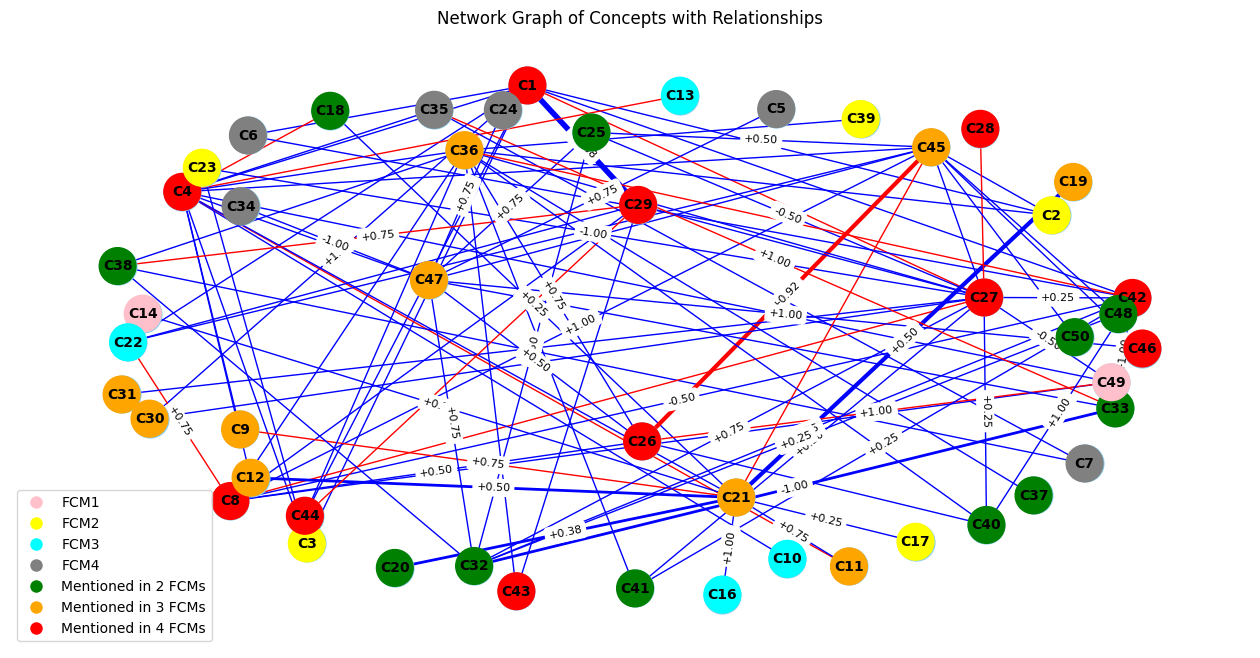

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the order of concepts (C1, C2, ..., C50) excluding C15
concept_order = [f"C{i}" for i in range(1, 51) if f"C{i}" != 'C15']

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all relationships from the DataFrames
all_relationships = []
for df in dfs:
    all_relationships.extend([(row, col) for row in df.index for col in df.columns if not pd.isna(df.at[row, col]) and df.at[row, col] != 0])

# Create a Counter to count the frequency of each relationship
from collections import Counter
relationship_counter = Counter(all_relationships)

# Create a DataFrame to store the frequency of relationships
frequency_df = pd.DataFrame({'Relationship': list(relationship_counter.keys()), 'Frequency': list(relationship_counter.values())})

# Split the tuple in 'Relationship' column into two separate columns
frequency_df[['Source', 'Target']] = pd.DataFrame(frequency_df['Relationship'].tolist(), index=frequency_df.index)

# Drop the 'Relationship' column
frequency_df.drop(columns=['Relationship'], inplace=True)

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Reset index for better display
frequency_df.reset_index(drop=True, inplace=True)

# Merge all FCMs into one DataFrame
merged_df = pd.concat(dfs, axis=0, keys=[f"FCM{i+1}" for i in range(len(dfs))])

# Initialize an empty DataFrame for the final merged FCM
final_merged_df = pd.DataFrame(index=concept_order, columns=concept_order)

# Calculate the mean of non-zero values for each cell across all FCMs
for row in final_merged_df.index:
    for col in final_merged_df.columns:
        values = [df.loc[row, col] for df in dfs if row in df.index and col in df.columns and df.loc[row, col] != 0]
        if values:
            final_merged_df.at[row, col] = np.mean(values)

# Fill NaN values with 0
final_merged_df.fillna(0, inplace=True)

# Create a graph from the final merged FCM, excluding C15
G = nx.from_pandas_adjacency(final_merged_df.reindex(concept_order, axis=0).reindex(concept_order, axis=1))

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Create a dictionary to store the concept colors
concept_colors = {}

# Iterate over the concepts and assign colors based on their presence in each FCM
for concept in concept_order:
    count = sum(concept in df.index for df in dfs)
    if count == 1:
        for i, df in enumerate(dfs):
            if concept in df.index:
                concept_colors[concept] = fcm_colors[f'FCM{i+1}']
    elif count == 2:
        concept_colors[concept] = 'green'  # Mentioned in two FCMs
    elif count == 3:
        concept_colors[concept] = 'orange'  # Mentioned in three FCMs
    elif count == 4:
        concept_colors[concept] = 'red'  # Mentioned in all four FCMs
    else:
        concept_colors[concept] = 'gray'  # Concept not found in any FCM (should not happen)

# Draw the graph
plt.figure(figsize=(16, 8))

# Adjust the node positions using the spring layout with fixed node positions
pos = nx.spring_layout(G, seed=42, k=1.5, iterations=50)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with edge labels and colors based on their sign and frequency
edge_labels = {}
edge_colors = []
edge_widths = []
for u, v, data in G.edges(data=True):
    if final_merged_df.loc[u, v] > 0:
        edge_labels[(u, v)] = f'+{final_merged_df.loc[u, v]:.2f}'
        edge_colors.append('blue')  # Change edge color to blue for positive relationships
    elif final_merged_df.loc[u, v] < 0:
        edge_labels[(u, v)] = f'-{abs(final_merged_df.loc[u, v]):-.2f}'
        edge_colors.append('red')  # Change edge color to red for negative relationships
    frequency = frequency_df[(frequency_df['Source'] == u) & (frequency_df['Target'] == v)]['Frequency'].values
    width = frequency[0] if frequency.size > 0 else 1
    edge_widths.append(width)

nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors)  # Use edge_colors for edge colors
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

# Draw nodes with colors based on concept frequency across FCMs
nx.draw_networkx_nodes(G, pos, node_size=700, nodelist=concept_colors.keys(), node_color=list(concept_colors.values()))

# Show legend
legend_elements = []
for fcm, color in fcm_colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{fcm}', markerfacecolor=color, markersize=10))

# Add legend elements for other colors
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 2 FCMs', markerfacecolor='green', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 3 FCMs', markerfacecolor='orange', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 4 FCMs', markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements)
plt.title('Network Graph of Concepts with Relationships')
plt.axis('off')  # Turn off axis

plt.savefig("FCM implementing the Strength of Relationships.png")
plt.show()


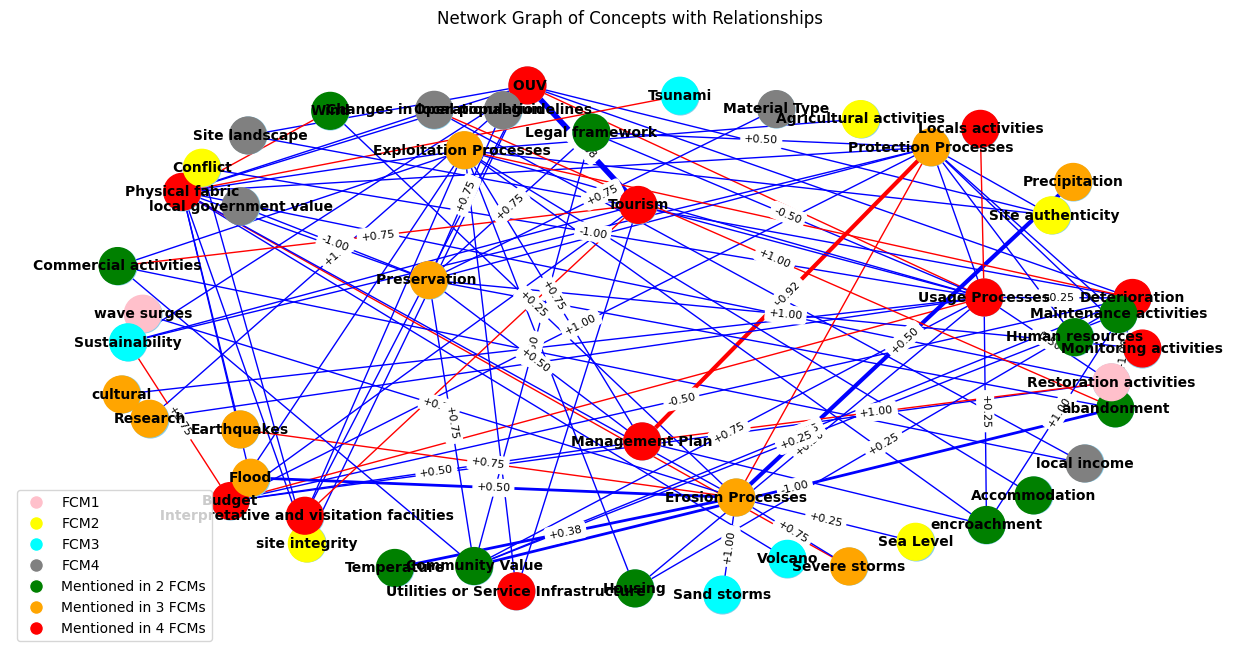

In [81]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the order of concepts (C1, C2, ..., C50) excluding C15
concept_order = [f"C{i}" for i in range(1, 51) if f"C{i}" != 'C15']

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all relationships from the DataFrames
all_relationships = []
for df in dfs:
    all_relationships.extend([(row, col) for row in df.index for col in df.columns if not pd.isna(df.at[row, col]) and df.at[row, col] != 0])

# Create a Counter to count the frequency of each relationship
from collections import Counter
relationship_counter = Counter(all_relationships)

# Create a DataFrame to store the frequency of relationships
frequency_df = pd.DataFrame({'Relationship': list(relationship_counter.keys()), 'Frequency': list(relationship_counter.values())})

# Split the tuple in 'Relationship' column into two separate columns
frequency_df[['Source', 'Target']] = pd.DataFrame(frequency_df['Relationship'].tolist(), index=frequency_df.index)

# Drop the 'Relationship' column
frequency_df.drop(columns=['Relationship'], inplace=True)

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Reset index for better display
frequency_df.reset_index(drop=True, inplace=True)

# Merge all FCMs into one DataFrame
merged_df = pd.concat(dfs, axis=0, keys=[f"FCM{i+1}" for i in range(len(dfs))])

# Initialize an empty DataFrame for the final merged FCM
final_merged_df = pd.DataFrame(index=concept_order, columns=concept_order)

# Calculate the mean of non-zero values for each cell across all FCMs
for row in final_merged_df.index:
    for col in final_merged_df.columns:
        values = [df.loc[row, col] for df in dfs if row in df.index and col in df.columns and df.loc[row, col] != 0]
        if values:
            final_merged_df.at[row, col] = np.mean(values)

# Fill NaN values with 0
final_merged_df.fillna(0, inplace=True)

# Create a graph from the final merged FCM, excluding C15
G = nx.from_pandas_adjacency(final_merged_df.reindex(concept_order, axis=0).reindex(concept_order, axis=1))

# Read concept labels from CSV
labels_df = pd.read_csv('../Original Data/Concept label.csv')
concept_to_label = dict(zip(labels_df['Concept'], labels_df['Label']))

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Create a dictionary to store the concept colors
concept_colors = {}

# Iterate over the concepts and assign colors based on their presence in each FCM
for concept in concept_order:
    count = sum(concept in df.index for df in dfs)
    if count == 1:
        for i, df in enumerate(dfs):
            if concept in df.index:
                concept_colors[concept] = fcm_colors[f'FCM{i+1}']
    elif count == 2:
        concept_colors[concept] = 'green'  # Mentioned in two FCMs
    elif count == 3:
        concept_colors[concept] = 'orange'  # Mentioned in three FCMs
    elif count == 4:
        concept_colors[concept] = 'red'  # Mentioned in all four FCMs
    else:
        concept_colors[concept] = 'gray'  # Concept not found in any FCM (should not happen)

# Create a mapping from concept to label for node labels
node_labels = {concept: concept_to_label.get(concept, concept) for concept in G.nodes()}

# Draw the graph
plt.figure(figsize=(16, 8))

# Adjust the node positions using the spring layout with fixed node positions
pos = nx.spring_layout(G, seed=42, k=1.5, iterations=50)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Draw edges with edge labels and colors based on their sign and frequency
edge_labels = {}
edge_colors = []
edge_widths = []
for u, v, data in G.edges(data=True):
    if final_merged_df.loc[u, v] > 0:
        edge_labels[(u, v)] = f'+{final_merged_df.loc[u, v]:.2f}'
        edge_colors.append('blue')  # Change edge color to blue for positive relationships
    elif final_merged_df.loc[u, v] < 0:
        edge_labels[(u, v)] = f'-{abs(final_merged_df.loc[u, v]):.2f}'
        edge_colors.append('red')  # Change edge color to red for negative relationships
    frequency = frequency_df[(frequency_df['Source'] == u) & (frequency_df['Target'] == v)]['Frequency'].values
    width = frequency[0] if frequency.size > 0 else 1
    edge_widths.append(width)

nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors)  # Use edge_colors for edge colors
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

# Draw nodes with colors based on concept frequency across FCMs
nx.draw_networkx_nodes(G, pos, node_size=700, nodelist=concept_colors.keys(), node_color=list(concept_colors.values()))

# Show legend
legend_elements = []
for fcm, color in fcm_colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{fcm}', markerfacecolor=color, markersize=10))

# Add legend elements for other colors
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 2 FCMs', markerfacecolor='green', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 3 FCMs', markerfacecolor='orange', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 4 FCMs', markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements)
plt.title('Network Graph of Concepts with Relationships')
plt.axis('off')  # Turn off axis
plt.show()


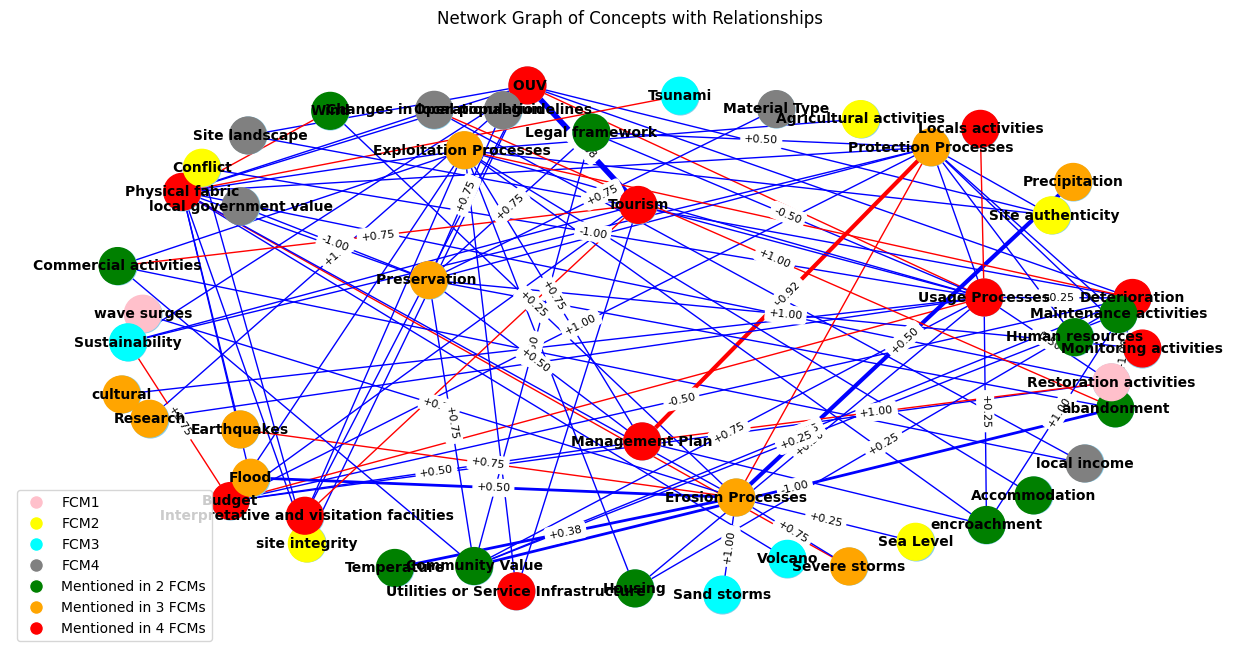

In [81]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the order of concepts (C1, C2, ..., C50) excluding C15
concept_order = [f"C{i}" for i in range(1, 51) if f"C{i}" != 'C15']

# File paths for FCM CSV files
file_paths = [f'../Original Data/EXPFCM{i}.csv' for i in range(1, 5)]

# Load each FCM and extract unique concepts
dfs = [pd.read_csv(file_path, index_col=0) for file_path in file_paths]

# Extract all relationships from the DataFrames
all_relationships = []
for df in dfs:
    all_relationships.extend([(row, col) for row in df.index for col in df.columns if not pd.isna(df.at[row, col]) and df.at[row, col] != 0])

# Create a Counter to count the frequency of each relationship
from collections import Counter
relationship_counter = Counter(all_relationships)

# Create a DataFrame to store the frequency of relationships
frequency_df = pd.DataFrame({'Relationship': list(relationship_counter.keys()), 'Frequency': list(relationship_counter.values())})

# Split the tuple in 'Relationship' column into two separate columns
frequency_df[['Source', 'Target']] = pd.DataFrame(frequency_df['Relationship'].tolist(), index=frequency_df.index)

# Drop the 'Relationship' column
frequency_df.drop(columns=['Relationship'], inplace=True)

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Reset index for better display
frequency_df.reset_index(drop=True, inplace=True)

# Merge all FCMs into one DataFrame
merged_df = pd.concat(dfs, axis=0, keys=[f"FCM{i+1}" for i in range(len(dfs))])

# Initialize an empty DataFrame for the final merged FCM
final_merged_df = pd.DataFrame(index=concept_order, columns=concept_order)

# Calculate the mean of non-zero values for each cell across all FCMs
for row in final_merged_df.index:
    for col in final_merged_df.columns:
        values = [df.loc[row, col] for df in dfs if row in df.index and col in df.columns and df.loc[row, col] != 0]
        if values:
            final_merged_df.at[row, col] = np.mean(values)

# Fill NaN values with 0
final_merged_df.fillna(0, inplace=True)

# Create a graph from the final merged FCM, excluding C15
G = nx.from_pandas_adjacency(final_merged_df.reindex(concept_order, axis=0).reindex(concept_order, axis=1))

# Read concept labels from CSV
labels_df = pd.read_csv('../Original Data/Concept label.csv')
concept_to_label = dict(zip(labels_df['Concept'], labels_df['Label']))

# Create a dictionary to store the color for each FCM
fcm_colors = {'FCM1': 'pink', 'FCM2': 'yellow', 'FCM3': 'cyan', 'FCM4': 'grey'}

# Create a dictionary to store the concept colors
concept_colors = {}

# Iterate over the concepts and assign colors based on their presence in each FCM
for concept in concept_order:
    count = sum(concept in df.index for df in dfs)
    if count == 1:
        for i, df in enumerate(dfs):
            if concept in df.index:
                concept_colors[concept] = fcm_colors[f'FCM{i+1}']
    elif count == 2:
        concept_colors[concept] = 'green'  # Mentioned in two FCMs
    elif count == 3:
        concept_colors[concept] = 'orange'  # Mentioned in three FCMs
    elif count == 4:
        concept_colors[concept] = 'red'  # Mentioned in all four FCMs
    else:
        concept_colors[concept] = 'gray'  # Concept not found in any FCM (should not happen)

# Create a mapping from concept to label for node labels
node_labels = {concept: concept_to_label.get(concept, concept) for concept in G.nodes()}

# Draw the graph
plt.figure(figsize=(16, 8))

# Adjust the node positions using the spring layout with fixed node positions
pos = nx.spring_layout(G, seed=42, k=1.5, iterations=50)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Draw edges with edge labels and colors based on their sign and frequency
edge_labels = {}
edge_colors = []
edge_widths = []
for u, v, data in G.edges(data=True):
    if final_merged_df.loc[u, v] > 0:
        edge_labels[(u, v)] = f'+{final_merged_df.loc[u, v]:.2f}'
        edge_colors.append('blue')  # Change edge color to blue for positive relationships
    elif final_merged_df.loc[u, v] < 0:
        edge_labels[(u, v)] = f'-{abs(final_merged_df.loc[u, v]):.2f}'
        edge_colors.append('red')  # Change edge color to red for negative relationships
    frequency = frequency_df[(frequency_df['Source'] == u) & (frequency_df['Target'] == v)]['Frequency'].values
    width = frequency[0] if frequency.size > 0 else 1
    edge_widths.append(width)

nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors)  # Use edge_colors for edge colors
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

# Draw nodes with colors based on concept frequency across FCMs
nx.draw_networkx_nodes(G, pos, node_size=700, nodelist=concept_colors.keys(), node_color=list(concept_colors.values()))

# Show legend
legend_elements = []
for fcm, color in fcm_colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{fcm}', markerfacecolor=color, markersize=10))

# Add legend elements for other colors
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 2 FCMs', markerfacecolor='green', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 3 FCMs', markerfacecolor='orange', markersize=10))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Mentioned in 4 FCMs', markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements)
plt.title('Network Graph of Concepts with Relationships')
plt.axis('off')  # Turn off axis
plt.show()


In [82]:
# Get the list of nodes in the graph
graph_nodes = list(G.nodes)

# Find concepts without relationships
concepts_without_relationships = [concept for concept in concept_order if concept not in graph_nodes]

if concepts_without_relationships:
    print("Concepts without relationships:")
    print(concepts_without_relationships)
else:
    print("All concepts have relationships.")


All concepts have relationships.


In [83]:
# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Filter the DataFrame to include only positive frequencies
positive_frequencies_df = frequency_df[frequency_df['Frequency'] > 0]

# Print the relationships with the highest positive frequencies
print("Relationships with the highest positive frequencies:")
print(positive_frequencies_df.head(10))  # Adjust the number to display more or fewer relationships


Relationships with the highest positive frequencies:
    Frequency Source Target
0           4    C44    C29
2           4     C1    C29
1           4    C28    C27
8           3    C26    C45
12          3    C19    C21
11          3    C21     C4
10          3    C29    C27
9           3    C44    C36
7           3    C43    C36
6           3    C31    C27


In [84]:
# Sort the DataFrame by frequency in ascending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=True)

# Filter the DataFrame to include only positive frequencies
positive_frequencies_df = frequency_df[frequency_df['Frequency'] > 0]

# Print the relationships with the lowest positive frequencies
print("Relationships with the lowest positive frequencies:")
print(positive_frequencies_df.head(10))  # Adjust the number to display more or fewer relationships


Relationships with the lowest positive frequencies:
    Frequency Source Target
97          1    C27    C32
35          1    C16    C21
36          1    C15    C21
37          1    C26    C47
38          1    C18    C21
39          1    C13     C4
40          1    C10     C4
41          1    C41    C36
43          1    C25    C47
63          1    C25    C45


In [85]:
# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Filter the DataFrame to include relationships with negative values in final_merged_df
negative_value_relationships = [(u, v) for u in final_merged_df.index for v in final_merged_df.columns if final_merged_df.loc[u, v] < 0]

# Filter the frequency_df to include only these relationships
negative_frequencies_df = frequency_df[frequency_df.apply(lambda row: (row['Source'], row['Target']) in negative_value_relationships, axis=1)]

# Print the relationships with negative relationship values
print("Relationships with the highest negative relationship values:")
print(negative_frequencies_df.head(5))  # Adjust the number to display more or fewer relationships



Relationships with the highest negative relationship values:
    Frequency Source Target
11          3    C21     C4
5           3    C45    C21
19          2    C11     C4
15          2    C42     C1
13          2    C32    C33


In [86]:
# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Filter the DataFrame to include relationships with negative values in final_merged_df and a frequency of 1
negative_value_relationships = [(u, v) for u in final_merged_df.index for v in final_merged_df.columns if final_merged_df.loc[u, v] < 0]
negative_frequencies_df = frequency_df[(frequency_df.apply(lambda row: (row['Source'], row['Target']) in negative_value_relationships, axis=1)) & (frequency_df['Frequency'] == 1)]

# Print the relationships with negative relationship values and a frequency of 1
print("Relationships with negative relationship values and a frequency of 1:")
print(negative_frequencies_df)

Relationships with negative relationship values and a frequency of 1:
     Frequency Source Target
59           1    C34    C47
31           1    C18     C4
32           1    C12     C4
40           1    C10     C4
39           1    C13     C4
51           1    C42     C6
29           1    C25    C27
55           1    C25    C32
49           1    C44     C1
58           1    C35     C4
95           1    C27    C49
69           1    C23    C27
99           1    C36     C4
70           1    C23     C3
75           1    C45     C8
93           1     C8    C42
82           1    C36     C2
101          1    C47    C33
46           1    C40    C26
81           1    C49     C8
67           1    C36    C27
66           1    C36     C8


In [87]:
# Extract positive relationships from final_merged_df
positive_relationships = final_merged_df[final_merged_df > 0].stack().reset_index()
positive_relationships.columns = ['Source', 'Target', 'Value']
positive_relationships = positive_relationships.sort_values(by='Value', ascending=False)

# Display the top 10 positive relationships
top_positive_relationships = positive_relationships.head(40)
top_positive_relationships['Source'] = top_positive_relationships['Source'].map(concept_to_label)
top_positive_relationships['Target'] = top_positive_relationships['Target'].map(concept_to_label)

print("Top positive relationships between concepts:")
print(top_positive_relationships)


Top positive relationships between concepts:
                                       Source                       Target  \
71                            Human resources         Protection Processes   
53                               encroachment                Deterioration   
28                            Usage Processes                          OUV   
29                            Usage Processes                       Budget   
35                                    Tourism                       Budget   
15                                Sand storms            Erosion Processes   
1                                         OUV                     Research   
44                                abandonment  Changes in local population   
45                                abandonment                Deterioration   
10                                     Budget         Protection Processes   
62                       Protection Processes              Physical fabric   
66                 

/tmp/ipykernel_2015/283299926.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_positive_relationships['Source'] = top_positive_relationships['Source'].map(concept_to_label)
/tmp/ipykernel_2015/283299926.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_positive_relationships['Target'] = top_positive_relationships['Target'].map(concept_to_label)


In [88]:
# Extract positive relationships from final_merged_df
positive_relationships = final_merged_df[final_merged_df > 0].stack().reset_index()
positive_relationships.columns = ['Source', 'Target', 'Value']
positive_relationships = positive_relationships.sort_values(by='Value', ascending=False)

# Map concept names to labels
positive_relationships['Source'] = positive_relationships['Source'].map(concept_to_label)
positive_relationships['Target'] = positive_relationships['Target'].map(concept_to_label)

# Display all positive relationships
print("All positive relationships between concepts:")
print(positive_relationships)


All positive relationships between concepts:
                         Source                   Target  Value
71              Human resources     Protection Processes   1.00
53                 encroachment            Deterioration   1.00
28              Usage Processes                      OUV   1.00
29              Usage Processes                   Budget   1.00
35                      Tourism                   Budget   1.00
..                          ...                      ...    ...
56                Deterioration  Exploitation Processes    0.25
33              Usage Processes            Deterioration   0.25
43              Community Value   Maintenance activities   0.25
16                    Sea Level        Erosion Processes   0.25
46  Changes in local population             local income   0.25

[72 rows x 3 columns]


In [89]:
# Extract negative relationships from final_merged_df
negative_relationships = final_merged_df[final_merged_df < 0].stack().reset_index()
negative_relationships.columns = ['Source', 'Target', 'Value']
negative_relationships = negative_relationships.sort_values(by='Value', ascending=True)  # Sort by Value ascending for top negatives

# Map concept names to labels
negative_relationships['Source'] = negative_relationships['Source'].map(concept_to_label)
negative_relationships['Target'] = negative_relationships['Target'].map(concept_to_label)

# Display the top negative relationships
print("Top negative relationships between concepts:")
print(negative_relationships.head(10))  # Adjust the number to display more or fewer relationships

Top negative relationships between concepts:
                                       Source              Target  Value
14                     local government value       Preservation   -1.00
16                    Exploitation Processes    Site authenticity  -1.00
15                Changes in local population     Physical fabric  -1.00
13                            Community Value         abandonment  -1.00
8                                    Conflict      site integrity  -1.00
9                                    Conflict     Usage Processes  -1.00
4                                       Flood     Physical fabric  -1.00
2                                     Volcano     Physical fabric  -1.00
25                       Protection Processes              Budget  -1.00
24   Interpretative and visitation facilities                 OUV  -0.75


In [91]:
import pandas as pd

# Load concept labels from CSV
labels_df = pd.read_csv('../Original Data/Concept label.csv')
concept_to_label = dict(zip(labels_df['Concept'], labels_df['Label']))

# Assuming frequency_df is already defined and contains 'Source' and 'Target' columns

# Map concept names to labels in frequency_df
frequency_df['Source'] = frequency_df['Source'].map(concept_to_label)
frequency_df['Target'] = frequency_df['Target'].map(concept_to_label)

# Filter the DataFrame to include only positive frequencies
positive_frequencies_df = frequency_df[frequency_df['Frequency'] > 0]

# Sort the DataFrame by frequency in descending order
positive_frequencies_df = positive_frequencies_df.sort_values(by='Frequency', ascending=False)

# Print the relationships with the highest positive frequencies
print("Relationships with the highest positive frequencies:")
print(positive_frequencies_df.head(10))  # Adjust the number to display more or fewer relationships

Relationships with the highest positive frequencies:
    Frequency                                     Source  \
0           4   Interpretative and visitation facilities   
2           4                                        OUV   
1           4                          Locals activities   
6           3                                   cultural   
7           3        Utilities or Service Infrastructure   
8           3                            Management Plan   
12          3                              Precipitation   
11          3                          Erosion Processes   
5           3                       Protection Processes   
4           3                      Monitoring activities   

                     Target  
0                   Tourism  
2                   Tourism  
1           Usage Processes  
6           Usage Processes  
7   Exploitation Processes   
8      Protection Processes  
12        Erosion Processes  
11          Physical fabric  
5         Erosio

In [94]:
# Extract positive relationships from final_merged_df
positive_relationships = final_merged_df[final_merged_df > 0].stack().reset_index()
positive_relationships.columns = ['Source', 'Target', 'Value']
positive_relationships = positive_relationships.sort_values(by='Value', ascending=True)  # Sort by Value ascending for lowest positives

# Map concept names to labels
positive_relationships['Source'] = positive_relationships['Source'].map(concept_to_label)
positive_relationships['Target'] = positive_relationships['Target'].map(concept_to_label)

# Display the lowest positive relationships
print("Lowest positive relationships between concepts:")
print(positive_relationships.head(10))  # Adjust the number to display more or fewer relationships

Lowest positive relationships between concepts:
                         Source                   Target  Value
16                    Sea Level        Erosion Processes   0.25
55                      Housing            Deterioration   0.25
63         Protection Processes           Sustainability   0.25
56                Deterioration  Exploitation Processes    0.25
31              Usage Processes             encroachment   0.25
46  Changes in local population             local income   0.25
43              Community Value   Maintenance activities   0.25
20               Sustainability                      OUV   0.25
17                         Wind        Erosion Processes   0.25
33              Usage Processes            Deterioration   0.25


In [96]:
# Extract negative relationships from final_merged_df
negative_relationships = final_merged_df[final_merged_df < 0].stack().reset_index()
negative_relationships.columns = ['Source', 'Target', 'Value']
negative_relationships = negative_relationships.sort_values(by='Value', ascending=True) # Sort by Value descending for highest negatives 

# Map concept names to labels
negative_relationships['Source'] = negative_relationships['Source'].map(concept_to_label)
negative_relationships['Target'] = negative_relationships['Target'].map(concept_to_label)

# Display the lowest negative relationships
print("Highest negative relationships between concepts:")
print(negative_relationships.head(10))  # Adjust the number to display more or fewer relationships

Highest negative relationships between concepts:
                                       Source              Target  Value
14                     local government value       Preservation   -1.00
16                    Exploitation Processes    Site authenticity  -1.00
15                Changes in local population     Physical fabric  -1.00
13                            Community Value         abandonment  -1.00
8                                    Conflict      site integrity  -1.00
9                                    Conflict     Usage Processes  -1.00
4                                       Flood     Physical fabric  -1.00
2                                     Volcano     Physical fabric  -1.00
25                       Protection Processes              Budget  -1.00
24   Interpretative and visitation facilities                 OUV  -0.75


In [97]:
# Extract negative relationships from final_merged_df
negative_relationships = final_merged_df[final_merged_df < 0].stack().reset_index()
negative_relationships.columns = ['Source', 'Target', 'Value']
negative_relationships = negative_relationships.sort_values(by='Value', ascending=False)  # Sort by Value ascending for lowest negatives

# Map concept names to labels
negative_relationships['Source'] = negative_relationships['Source'].map(concept_to_label)
negative_relationships['Target'] = negative_relationships['Target'].map(concept_to_label)

# Display the highest negative relationships
print("Lowest negative relationships between concepts:")
print(negative_relationships.head(10))  # Adjust the number to display more or fewer relationships


Lowest negative relationships between concepts:
                     Source                  Target  Value
6                      Wind         Physical fabric  -0.25
0                    Budget           Deterioration  -0.50
10          Legal framework         Usage Processes  -0.50
27            Preservation              abandonment  -0.50
22            Deterioration          Site landscape  -0.50
19  Exploitation Processes          Usage Processes  -0.50
17  Exploitation Processes          Physical fabric  -0.50
1               Earthquakes         Physical fabric  -0.50
12          Usage Processes  Restoration activities  -0.50
11          Legal framework         Community Value  -0.50
